# CoderHouse - Grupo 7 - Entrega Final Proyecto

* <b>Profesor:</b> David Romero Acosta

* <b>Tutoria:</b> Hector Ponce Schwarz

<b>Alumnos:</b>
* Juan Pascual
* Lucas Ariel Saavedra
* Bartolome Oscar Meritello
* Jose Mornaghi


# Tabla de Contenidos
Importacion de Librerias y Funciones
1. Plan de Investigacion
2. Analisis Univariado
3. Analisis Bivariado
4. Analisis Multivariado
5. Modelos de clasificacion
6. Adecuacion del Dataset y Modelos de Clasificacion con Analisis de Hiperparametros

# Importacion de Librerias y Funciones 

### Importación de las Librerías Necesarias

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import pylab as pl
import plotly.express as px
from sklearn.impute import KNNImputer
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder)
from imblearn.over_sampling import (SMOTE,
                                    ADASYN,
                                    RandomOverSampler) 
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.linear_model import (LinearRegression,
                                  LogisticRegression)
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     GridSearchCV)
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.tree import (plot_tree,
                          DecisionTreeClassifier,
                          DecisionTreeRegressor)
from sklearn import metrics
from sklearn.metrics import (classification_report,
                             accuracy_score,
                             recall_score,
                             roc_auc_score,
                             precision_score,
                             f1_score,
                             classification_report,
                             confusion_matrix,
                             plot_confusion_matrix,
                             roc_curve,
                             auc,
                             RocCurveDisplay)
from sklearn.svm import SVC

warnings.filterwarnings("ignore")

### Funciones

In [220]:
def histogramAndBoxPlot(stroke_dataset, variable):
    fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

    plot0=sns.distplot(stroke_dataset[stroke_dataset[variable]!=0][variable],ax=axes[0],color='brown')
    axes[0].set_title(f'Distribution of {variable}',fontdict={'fontsize':8})
    axes[0].set_xlabel(f'{variable}',fontdict={'fontsize':7})
    axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
    plt.tight_layout()

    plot1=sns.boxplot(stroke_dataset[stroke_dataset[variable]!=0][variable],ax=axes[1],orient='v')
    axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
    axes[1].set_xlabel(f'{variable}',fontdict={'fontsize':7})
    axes[1].set_ylabel(r'Five Point Summary(BP)',fontdict={'fontsize':7})
    plt.tight_layout()
    
def frequencyTable(stroke_dataset, variable):
    frec = stroke_dataset[variable].value_counts()
    frec_df = pd.DataFrame(frec)
    frec_df.rename(columns={variable:'Frec_abs'},inplace=True)
    Frec_abs_val = frec_df["Frec_abs"].values
    acum = []
    valor_acum = 0
    for i in Frec_abs_val:
        valor_acum = valor_acum + i
        acum.append(valor_acum)
    frec_df["frec_abs_acum"] = acum
    frec_df["frec_rel_%"] = round(100 * frec_df["Frec_abs"]/len(stroke_dataset[variable]),4)
    Frec_rel_val = frec_df["frec_rel_%"].values
    acum = []
    valor_acum = 0
    for i in Frec_rel_val:
        valor_acum = valor_acum + i
        acum.append(valor_acum)
    frec_df["frec_rel_%_acum"] = acum
    display(frec_df)

# Plan de Investigacion y Objetivos

El objetivo principal de este trabajo es predecir si un individuo sufrirá un accidente cerebrovascular (Stroke) o no. Para esto obtuvimos información de un dataset tomado de Kaggle (https://www.kaggle.com/) e intentamos responder a ciertas preguntas cómo:
* ¿La edad impacta en las probabilidades de sufrir esta enfermedad?
* ¿El estilo de vida de una persona la podría inducir a sufrir esta dolencia?
    * ¿En que medida respecto a la edad por ejemplo?
    * ¿Ser fumador influye en la misma?
    * ¿El nivel de glucosa en sangre?
    * ¿El indice de masa corporal?
    * ¿El tipo de trabajo?
* ¿Los hombres son más propensos a sufrir un ACV?
* ¿El lugar de residencia de una persona podría influir?
* Padecer de hipertensión o haber sufrido un ataque al corazón aumentan el riesgo, ¿Es esto cierto?

Antes de continuar con el análisis de la información debemos hacer enfásis en preguntarnos:
* [¿Qué es un ACV (stroke)?](https://www.stroke.org/en/about-stroke)
* [¿Cómo podemos prevenirlo?](https://www.hospitalaleman.org.ar/prevencion/acv-como-prevenirlo/)

## Descripción del DataSet

El dataset utilizado presenta 12 variables, 11 de las cuales nos ayudarán (o no) a responder las preguntas planteadas previamente entorno a la variable objetivo "Stroke". A continuación describiremos brevemente cada una de estas variables, algunas categoricas y algunas numéricas:

* id: número identificatorio del individuo.
* gender: género del individuo estudiado (masculino, femenino)
* age: edad del indidividuo
* hypertension: parámetro de salud relacionado. ¿El individuo tiene hipertensión? Posibles respuestas: Si (1), No (0).
* heart_disease: parámetro de salud relacionado. ¿El individuo tiene alguna enfermedad cardíaca? Posibles respuestas: Si (1), No (0).
* ever_married: estado civil del individuo. ¿Está casado? Si, No.
* work_type: tipo de trabajao del individuo. Se toma en consideración la posibilidad de que el mismo sea un niño y en ese caso se lo marca como tal. Posibles respuestas: Privado, 'Self-employed', 'Govt_job', Niño, 'Never_worked'.
* Residence_type: parámetro personal, tipo de residencia del individuo distinguiendo entre zona Urbana o Rural.
* avg_glucose_level
* smoking_status: parámetro de salud relacionado. ¿Es fumador el individuo? Posibles respuestas: Si (1), No (0).
* bmi: parámetro de salud relacionado. Indice de masa del individuo.
* stroke: variable 'Target' u Objetivo. ¿La persona sufrió un Stroke?

## Vistazo inicial del DataSet

In [221]:
stroke_dataset = pd.read_csv("stroke.csv")
stroke_dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [222]:
frequencyTable(stroke_dataset, 'stroke')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
0,4861,4861,95.1272,95.1272
1,249,5110,4.8728,100.0000


## Reprocesamiento inicial de los Datos - Buscando Nan Values

En principio replanteamos el DataSet sacando el dato ID ya que será totalmente irrelevante para nuestro análisis.

In [223]:
stroke_dataset = stroke_dataset.drop("id", axis=1)

Desplegamos la info....

In [224]:
stroke_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Obtenemos los datos nulos de las columnas

In [225]:
stroke_dataset.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Podemos ver que la unica variable que contiene datos NaN (nulos) es la del índice de masa corporal ('bmi').
En base a esta información, imputaremos los datos de la variable BMI con la función KNNImputer. Los valores faltantes de cada muestra se imputan utilizando el valor medio de los vecinos más cercanos de n_neighbors que se encuentran en el conjunto de entrenamiento.

In [226]:
imputador = KNNImputer(n_neighbors=3, weights="uniform")
stroke_dataset['imputed_bmi'] = imputador.fit_transform(stroke_dataset[['bmi']])
stroke_dataset.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
imputed_bmi            0
dtype: int64

In [227]:
stroke_dataset.describe()[["bmi", "imputed_bmi"]].T

,count,mean,std,min,25%,50%,75%,max
bmi,4909.0,28.893237,7.854067,10.3,23.5,28.1,33.1,97.6
imputed_bmi,5110.0,28.893237,7.698018,10.3,23.8,28.4,32.8,97.6


De ahora en más, trabajaremos con el DataSet con los datos de BMI imputados, creando un nuevo archivo CSV y trabajaremos con el mismo.

In [228]:
stroke_dataset = stroke_dataset.drop("bmi", axis = 1)
stroke_dataset = stroke_dataset.rename(columns={'imputed_bmi': 'bmi'})
stroke_dataset = stroke_dataset.drop(3116)
# Eliminamos un individuo del dataset que no especifico su sexo
stroke_dataset.to_csv("stroke_imputed.csv", index=False)

In [229]:
stroke_dataset = pd.read_csv("stroke_imputed.csv")
stroke_dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,36.600000
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,28.893237
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,32.500000
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,34.400000
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,24.000000
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0,28.893237
5105,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0,40.000000
5106,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0,30.600000
5107,Male,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0,25.600000


# Análisis Univariado

Disenamos una función que usaremos para realizar este análisis, que despliega un histógrama y un gráfico de caja de porcentajes de la variable analizada.

### Índice de masa corporal (BMI)

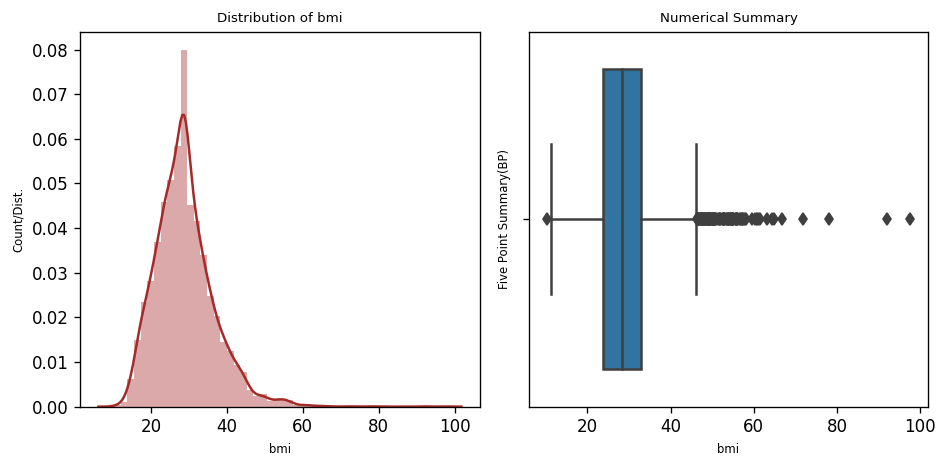

In [230]:
histogramAndBoxPlot(stroke_dataset, 'bmi')

Los analisis de bmi indican que los valores sobre 35 es obesidad extrema. Hay que analizar en el dataset si puede que algunos valores esten mal ingresados o no tengan sentido.

### Edad

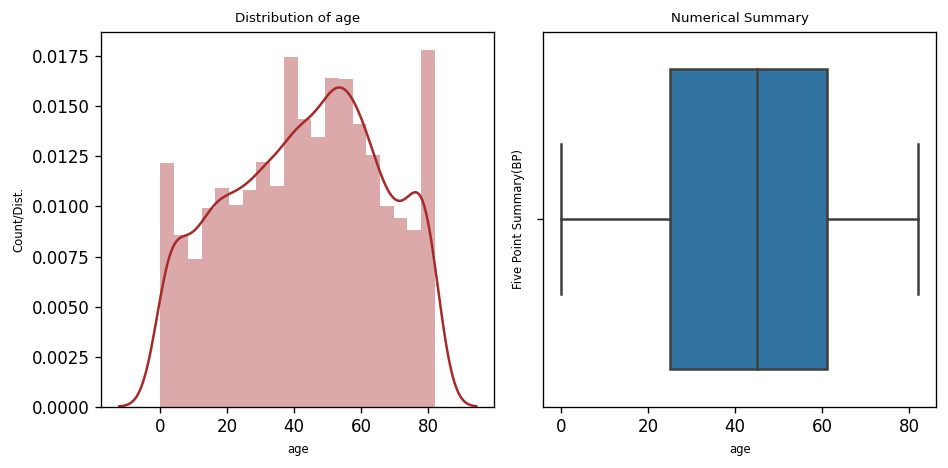

In [231]:
histogramAndBoxPlot(stroke_dataset, 'age')

### Nivel de Glucosa

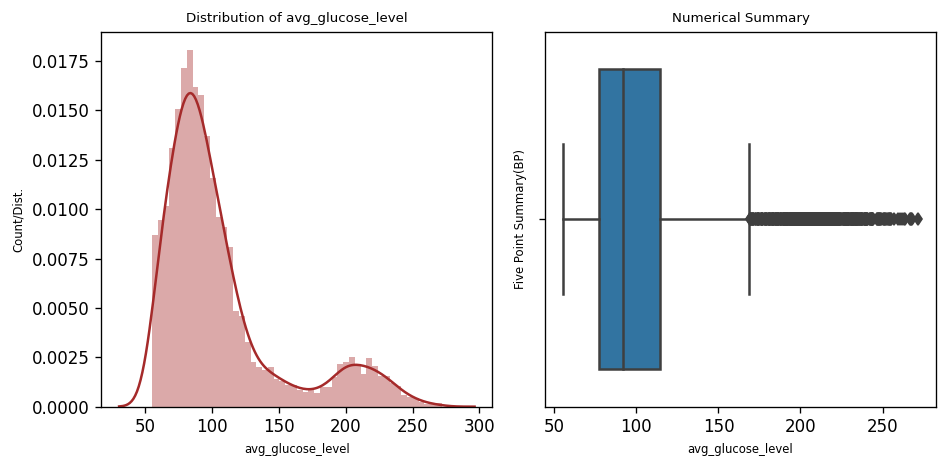

In [232]:
histogramAndBoxPlot(stroke_dataset, 'avg_glucose_level')

### A continuación realizamos unos gráficos de torta de 3 variables, para así poder analizar la distribución de dichas variables categoricas:

- Género (gender)
- Hipertensión (hypertension)
- Enfermedades cardíacas (heart_disease)

### Género

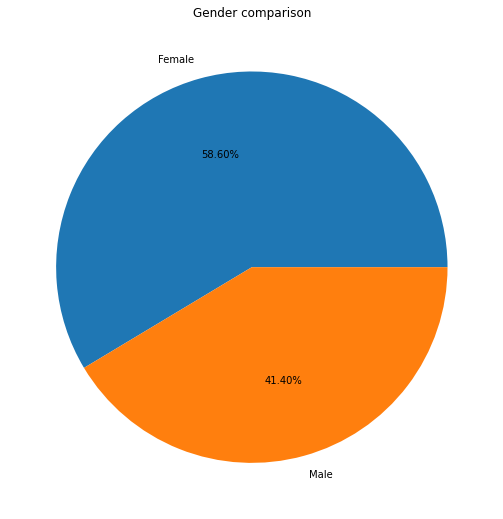

In [233]:
GenderComparison = stroke_dataset.groupby('gender').count()['stroke']

plt.pie(x=GenderComparison, labels=GenderComparison.index, autopct='%1.2f%%')
plt.title('Gender comparison')
plt.show()

### Hipertensión

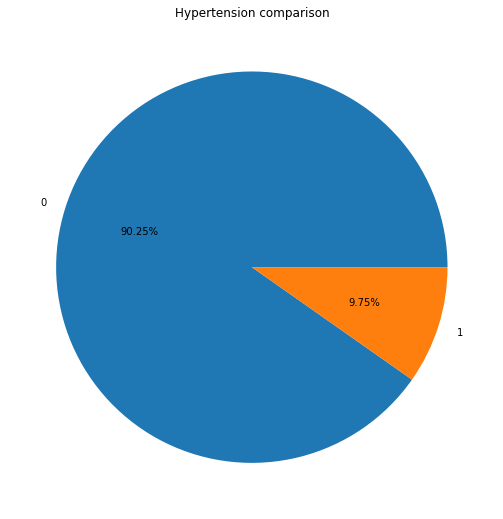

In [234]:
HypertensionComparison = stroke_dataset.groupby('hypertension').count()['stroke']

plt.pie(x=HypertensionComparison, labels=HypertensionComparison.index, autopct='%1.2f%%')
plt.title('Hypertension comparison')
plt.show()

### Enfermedades cardíacas

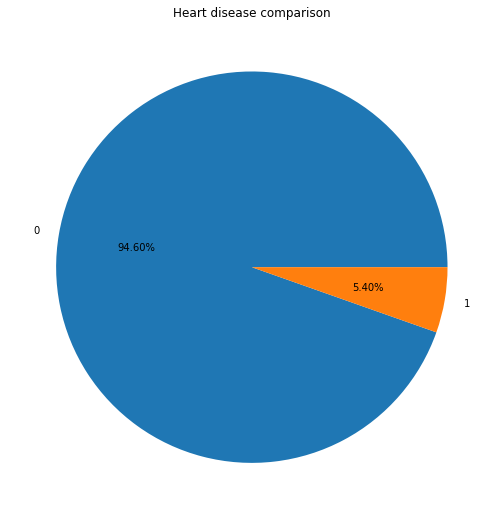

In [235]:
HeartDiseaseComparison = stroke_dataset.groupby('heart_disease').count()['stroke']

plt.pie(x=HeartDiseaseComparison, labels=HeartDiseaseComparison.index, autopct='%1.2f%%')
plt.title('Heart disease comparison')
plt.show()

## Distribución de Frecuencias

Para finalizar el análisis univariado, realizamos una tabla de distribución de frecuencias de todas las variables categóricas y la variable objetivo. A fin de realizar dicha tabla, creamos una función auxiliar.

### Smoking status

In [236]:
frequencyTable(stroke_dataset, 'smoking_status')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
never smoked,1892,1892,37.0327,37.0327
Unknown,1544,3436,30.2212,67.2539
formerly smoked,884,4320,17.3028,84.5567
smokes,789,5109,15.4433,100.0000


### Género

In [237]:
frequencyTable(stroke_dataset, 'gender')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
Female,2994,2994,58.6025,58.6025
Male,2115,5109,41.3975,100.0000


### Hipertensión

In [238]:
frequencyTable(stroke_dataset, 'hypertension')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
0,4611,4611,90.2525,90.2525
1,498,5109,9.7475,100.0000


### Enfermedades cardíacas

In [239]:
frequencyTable(stroke_dataset, 'heart_disease')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
0,4833,4833,94.5978,94.5978
1,276,5109,5.4022,100.0000


### Estado Civil

In [240]:
frequencyTable(stroke_dataset, 'ever_married')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
Yes,3353,3353,65.6293,65.6293
No,1756,5109,34.3707,100.0000


### Tipo de trabajo

In [241]:
frequencyTable(stroke_dataset, 'work_type')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
Private,2924,2924,57.2323,57.2323
Self-employed,819,3743,16.0305,73.2628
children,687,4430,13.4469,86.7097
Govt_job,657,5087,12.8597,99.5694
Never_worked,22,5109,0.4306,100.0000


### Tipo de residencia

In [242]:
frequencyTable(stroke_dataset, 'Residence_type')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
Urban,2596,2596,50.8123,50.8123
Rural,2513,5109,49.1877,100.0000


### ACV

In [243]:
frequencyTable(stroke_dataset, 'stroke')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
0,4860,4860,95.1262,95.1262
1,249,5109,4.8738,100.0000


# Análisis Bivariado

En este análisis realizaremos 2 tipos de gráficos para comparar de a 2 variables. Para hacer esto creamos 2 funciones auxiliares.

In [244]:
def boxPlotComparison(dataset, target, variable):
    plt.rcParams['figure.figsize'] = (12, 9)
    sns.boxplot(dataset[target], dataset[variable], palette = 'Blues')
    plt.title(f'{target} vs {variable}', fontsize = 20)
    plt.show()

def violinPlotComparison(dataset, target, variable):
    plt.rcParams['figure.figsize'] = (12, 9)
    sns.violinplot(dataset[target], dataset[variable], palette = 'Blues')
    plt.title(f'Relación entre {variable} y {target}', fontsize = 20, fontweight = 30)
    plt.show()

Procedemos a reemplazar valores númericos dentro de las variables categoricas para poder realizar el heatmap

In [245]:
stroke_dataset.stroke = stroke_dataset.stroke.replace({0:'Non-Stroke',1:'Stroke'})
stroke_dataset.heart_disease = stroke_dataset.heart_disease.replace({0:'No',1:'Yes'})
stroke_dataset.hypertension = stroke_dataset.hypertension.replace({0:'No',1:'Yes'})
stroke_dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,formerly smoked,Stroke,36.600000
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,never smoked,Stroke,28.893237
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,never smoked,Stroke,32.500000
3,Female,49.0,No,No,Yes,Private,Urban,171.23,smokes,Stroke,34.400000
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,never smoked,Stroke,24.000000


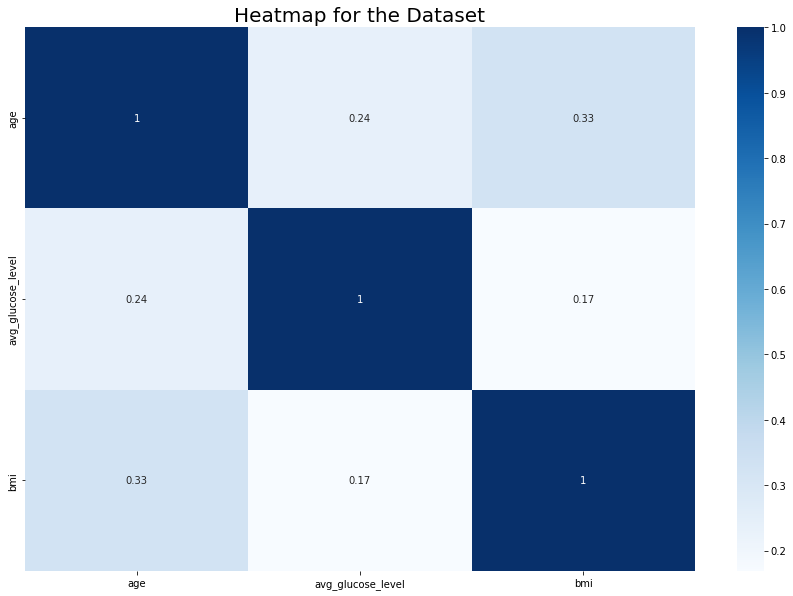

In [246]:
#HeatMap del df
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(stroke_dataset.corr(), annot = True, cmap = 'Blues')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

## Númerica vs Categórica

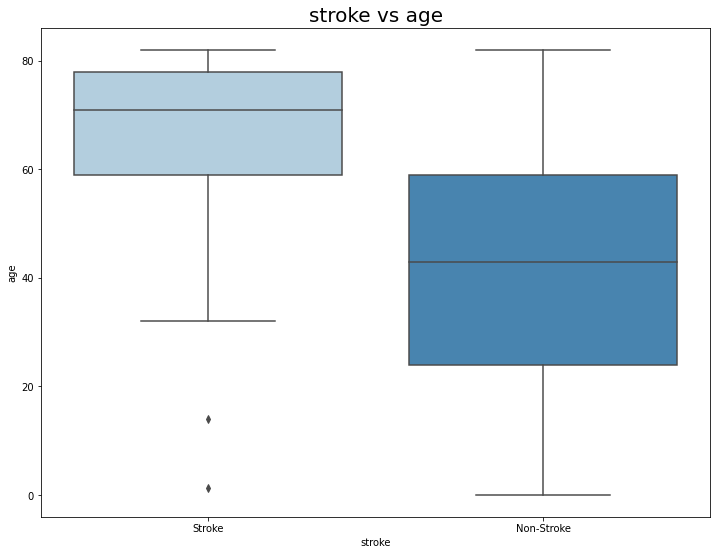

In [247]:
# age vs target
boxPlotComparison(stroke_dataset,'stroke','age')

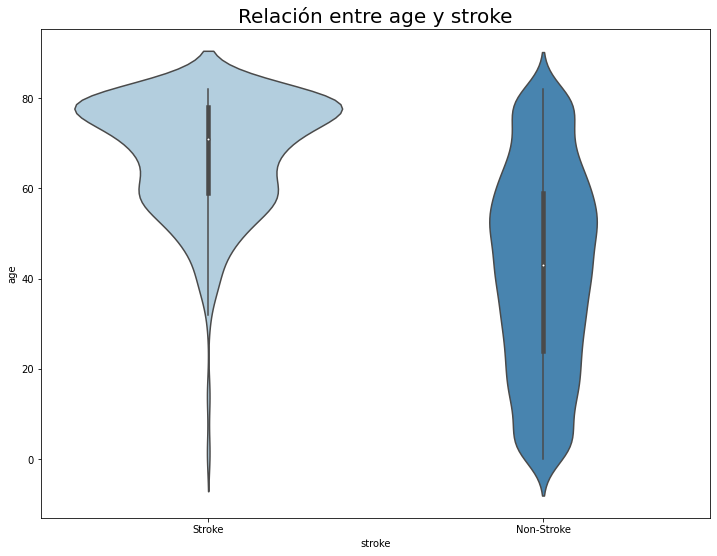

In [248]:
# age vs target
violinPlotComparison(stroke_dataset, 'stroke', 'age')

Podemos apreciar una clara influencia de la edad en las personas que sufrieron un stroke

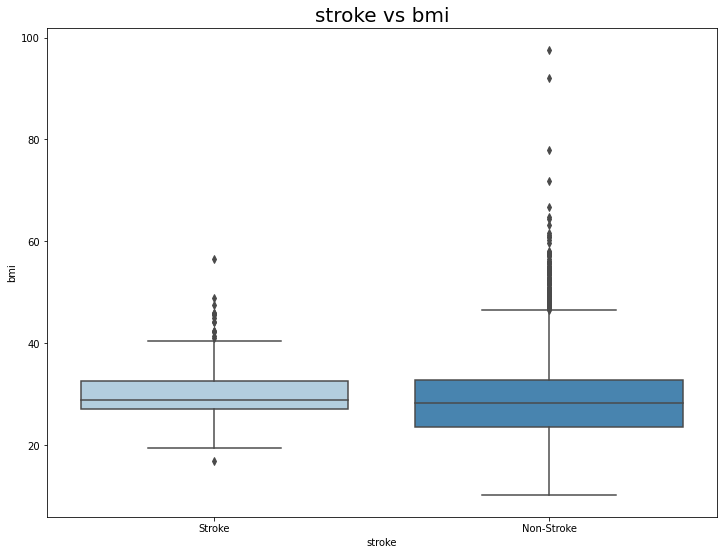

In [249]:
# bmi vs target
boxPlotComparison(stroke_dataset,'stroke','bmi')

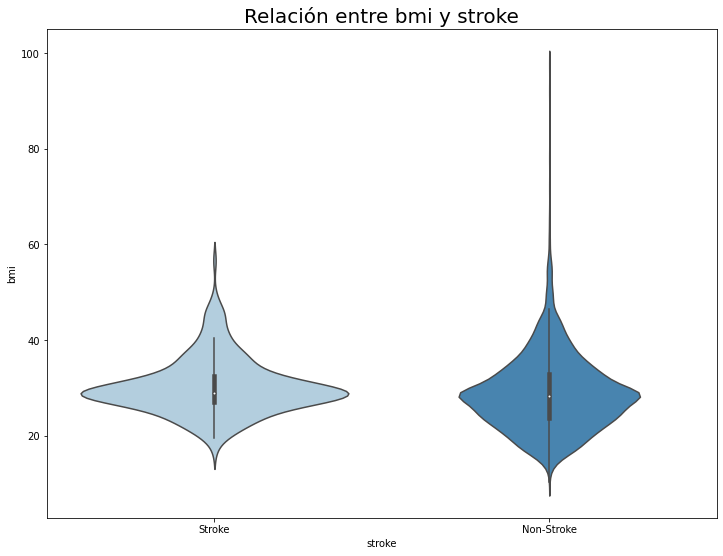

In [250]:
# bmi vs target
violinPlotComparison(stroke_dataset, 'stroke', 'bmi')

En este caso no podemos visualizar una influencia del bmi en la variable stroke

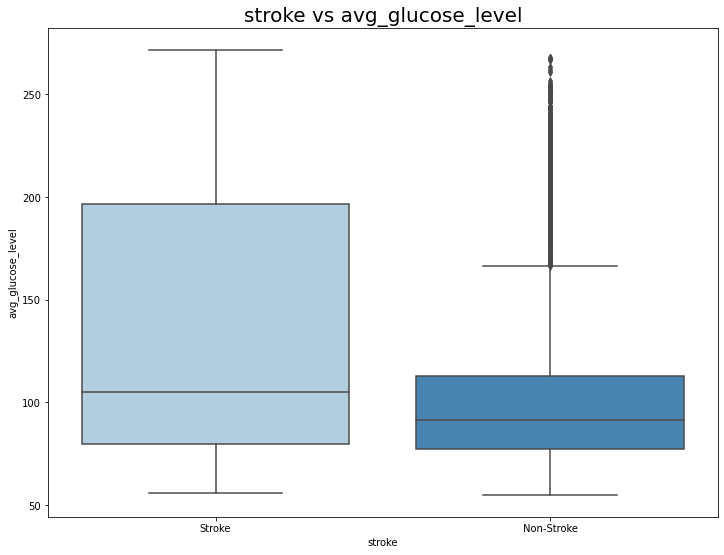

In [251]:
# avg_glucose_level vs target
boxPlotComparison(stroke_dataset,'stroke','avg_glucose_level')

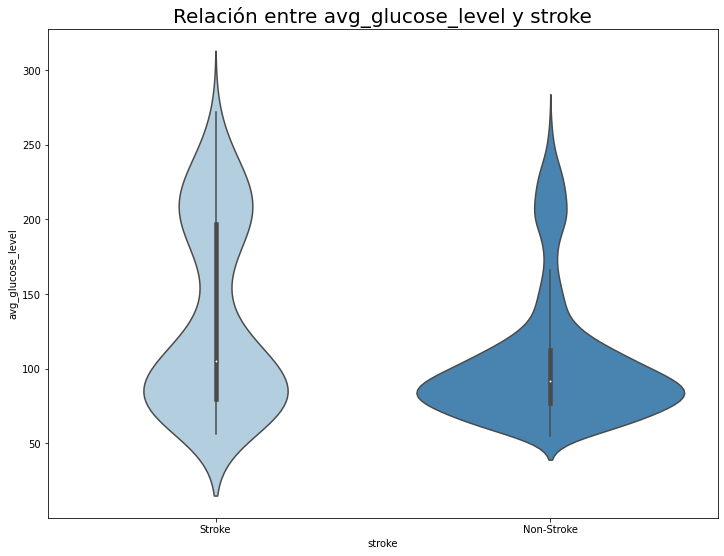

In [252]:
# avg_glucose_level vs target
violinPlotComparison(stroke_dataset, 'stroke', 'avg_glucose_level')

Acá podemos apreciar una leve influencia de la variable avg_glucose_level (nivel de glucosa en sangre) sobre si una persona tuvo un stroke o no, la mayoría de los sujetos con un avg_glucose_level superior a 100 tuvieron un stroke.

## Categórica vs. categórica

In [253]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['ever_married'])

ever_married,No,Yes
stroke,,
Non-Stroke,1727,3133
Stroke,29,220


In [254]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['ever_married'], normalize=True) 

ever_married,No,Yes
stroke,,
Non-Stroke,0.338031,0.613232
Stroke,0.005676,0.043061


Podemos apreciar que aquellos sujetos que se casaron alguna vez tienen significativamente más probabilidades de sufrir un stroke frente aquellos que nunca lo hicieron

In [255]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['smoking_status'])

smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
Non-Stroke,1497,814,1802,747
Stroke,47,70,90,42


In [256]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['smoking_status'], normalize=True)

smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
Non-Stroke,0.293012,0.159327,0.352711,0.146213
Stroke,0.009199,0.013701,0.017616,0.008221


En esta ocasión no podemos sacar conclusiones definitorias según los datos

In [257]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['work_type'])

work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
Non-Stroke,624,22,2775,754,685
Stroke,33,0,149,65,2


In [258]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['work_type'],normalize=True)

work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
Non-Stroke,0.122137,0.004306,0.543159,0.147583,0.134077
Stroke,0.006459,0.000000,0.029164,0.012723,0.000391


Acá podemos obsbervar que aquellos pertenecientes a la categoria "self-employed" tienen en cierta medida mayor probabilidad de sufrir un stroke frente a las demás categorias

In [259]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['heart_disease'])

heart_disease,No,Yes
stroke,,
Non-Stroke,4631,229
Stroke,202,47


In [260]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['heart_disease'],normalize=True)

heart_disease,No,Yes
stroke,,
Non-Stroke,0.906440,0.044823
Stroke,0.039538,0.009199


En esta ocasión la tendencia es clara, aquellos que sufren una enfermedad del corazón tienen significativamente más probabilidades de sufrir un stroke

In [261]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['hypertension'])

hypertension,No,Yes
stroke,,
Non-Stroke,4428,432
Stroke,183,66


In [262]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['hypertension'], normalize=True)

hypertension,No,Yes
stroke,,
Non-Stroke,0.866706,0.084557
Stroke,0.035819,0.012918


Aquí también podemos apreciar una tendencia similar a la de heart_disease, donde aquellos que sufren de hipertensión son más propensos a padecer un stroke

In [263]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['gender'])

gender,Female,Male
stroke,,
Non-Stroke,2853,2007
Stroke,141,108


In [264]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['gender'], normalize=True)

gender,Female,Male
stroke,,
Non-Stroke,0.558426,0.392836
Stroke,0.027598,0.021139


Acá no podemos evidenciar tendencia alguna entre los géneros frente a la variable stoke

In [265]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['Residence_type'])

Residence_type,Rural,Urban
stroke,,
Non-Stroke,2399,2461
Stroke,114,135


In [266]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['Residence_type'], normalize=True)

Residence_type,Rural,Urban
stroke,,
Non-Stroke,0.469564,0.481699
Stroke,0.022314,0.026424


Cómo en el caso anterior, no podemos encontrar una tendencia notoria entre las categorias frente a la variable stroke

# Análisis Multivariado

### Distribución entre los generos en función del BMI

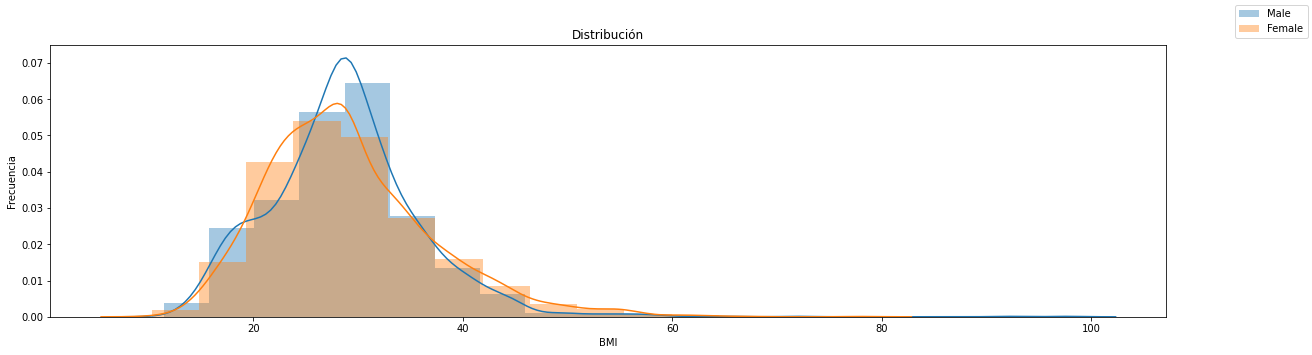

In [267]:
fig = plt.figure(figsize=(20,5))

sns.distplot(stroke_dataset[stroke_dataset.gender == 'Male'].bmi, kde=True, hist=True, bins=20, label='Male')
sns.distplot(stroke_dataset[stroke_dataset.gender == 'Female'].bmi, kde=True, hist=True, bins=15, label='Female')

fig.legend()
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.title('Distribución')

plt.show()

Podemos observar que el nivel de BMI de los hombres se distribuye de una manera mas normal que el de las mujeres.\
La mayor concentracion de BMI en hombres se haya aproximadamente en 30, mientras que el de las mujeres se distribuye mas equitativamente entre 20 y 30.\
Hay una ligera concentracion mayor en las mujeres de BMI mayor a 40 en relacion a los hombres, pero el genero masculino es el de outliers mas marcados.

### Representacion de la relacion entre niveles de glucosa y BMI diferenciado por genero

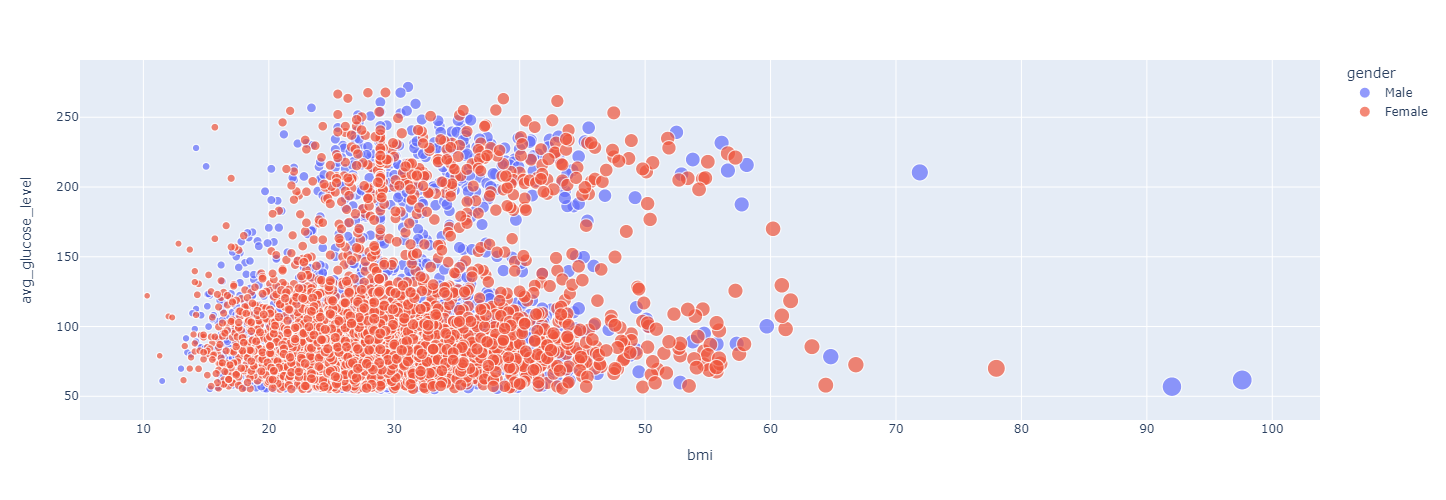

In [268]:
fig = px.scatter(stroke_dataset, x="bmi", y="avg_glucose_level",color='gender',size='bmi', width=1200, height=500)
fig.show()

El grafico desea mostrar que relacion puede llegar a haber entre nivel de glucosa y BMI.\
Si bien en el grafico no podemos inferir una relacion lineal entre ambas, siendo un valor determinado de BMI asociado generalmente a un intervalo especifico, la medicina ha demostrado que hay una directa correlacion entre un BMI elevado y un nivel de glucosa elevado. Un nivel de glucosa elevado conlleva a diabetes, y se da generalmente en persona de BMI elevado con una ingesta exagerada de azucares procesados.

### Distribución entre los generos en función del nivel de glucosa

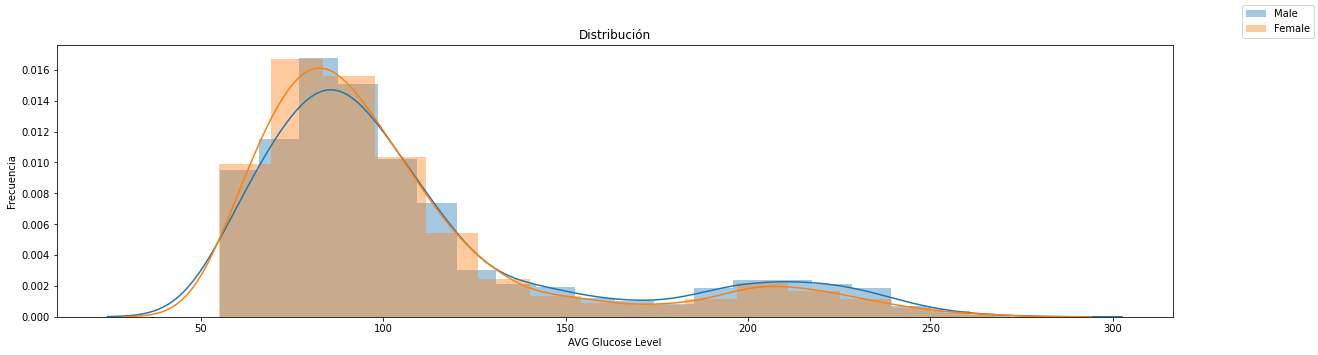

In [269]:
fig = plt.figure(figsize=(20,5))

sns.distplot(stroke_dataset[stroke_dataset.gender == 'Male'].avg_glucose_level, kde=True, hist=True, bins=20, label='Male')
sns.distplot(stroke_dataset[stroke_dataset.gender == 'Female'].avg_glucose_level, kde=True, hist=True, bins=15, label='Female')

fig.legend()
plt.xlabel('AVG Glucose Level')
plt.ylabel('Frecuencia')
plt.title('Distribución')

plt.show()

Ambos generos se distribuyen de manera muy similar, con la mayoria de los integrantes del dataset encontrandose entre los valores 60-100 de glucosa.

### Distribución entre los diferentes tipos de trabajo en función del nivel de glucosa

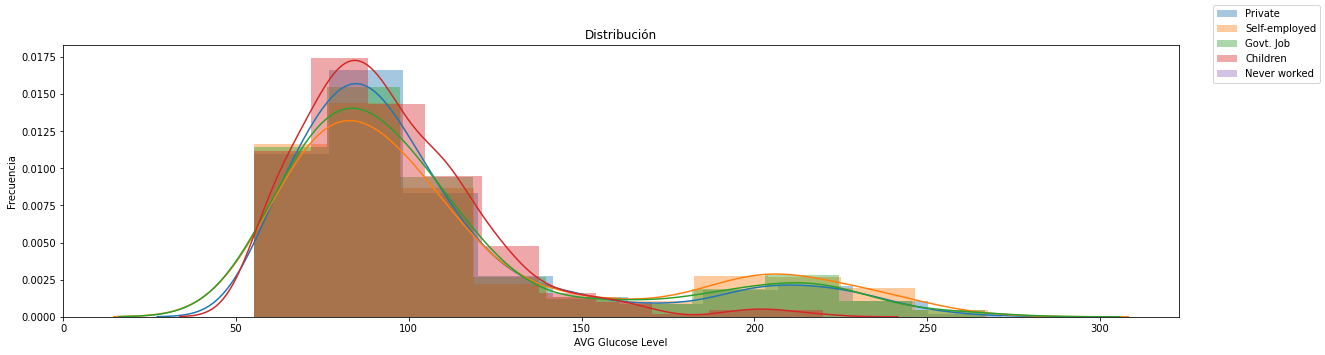

In [270]:
fig = plt.figure(figsize=(20,5))

sns.distplot(stroke_dataset[stroke_dataset.work_type == 'Private'].avg_glucose_level, kde=True, hist=True, bins=10, label='Private')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'Self-employed'].avg_glucose_level, kde=True, hist=True, bins=10, label='Self-employed')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'Govt_job'].avg_glucose_level, kde=True, hist=True, bins=10, label='Govt. Job')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'children'].avg_glucose_level, kde=True, hist=True, bins=10, label='Children')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'never_worked'].avg_glucose_level, kde=True, hist=True, bins=10, label='Never worked')

fig.legend()
plt.xlabel('AVG Glucose Level')
plt.ylabel('Frecuencia')
plt.title('Distribución')

plt.show()

El grafico intenta mostrar la diferencia en base a los tipos de trabajo. Es facil inferir que los ninos tienen un menor nivel de glucosa en general, y que los self employed son el grupo de personas de cola mas pesada.

### Distribución entre los diferentes tipos de trabajo en función del BMI

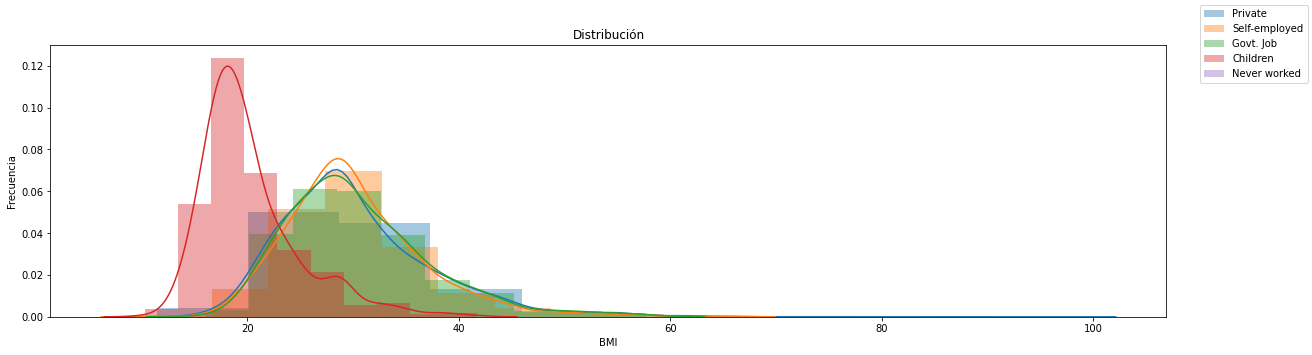

In [271]:
fig = plt.figure(figsize=(20,5))

sns.distplot(stroke_dataset[stroke_dataset.work_type == 'Private'].bmi, kde=True, hist=True, bins=10, label='Private')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'Self-employed'].bmi, kde=True, hist=True, bins=10, label='Self-employed')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'Govt_job'].bmi, kde=True, hist=True, bins=10, label='Govt. Job')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'children'].bmi, kde=True, hist=True, bins=10, label='Children')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'never_worked'].bmi, kde=True, hist=True, bins=10, label='Never worked')

fig.legend()
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.title('Distribución')

plt.show()

Este grafico a diferencia del anterior utiliza el BMI como indicador. El mismo patron se repite en los ninos, siendo este grupo el de menor BMI.
El resto de los grupos se distribuyen similarmente.

### Distribución entre los diferentes residencias en función del nivel de glucosa

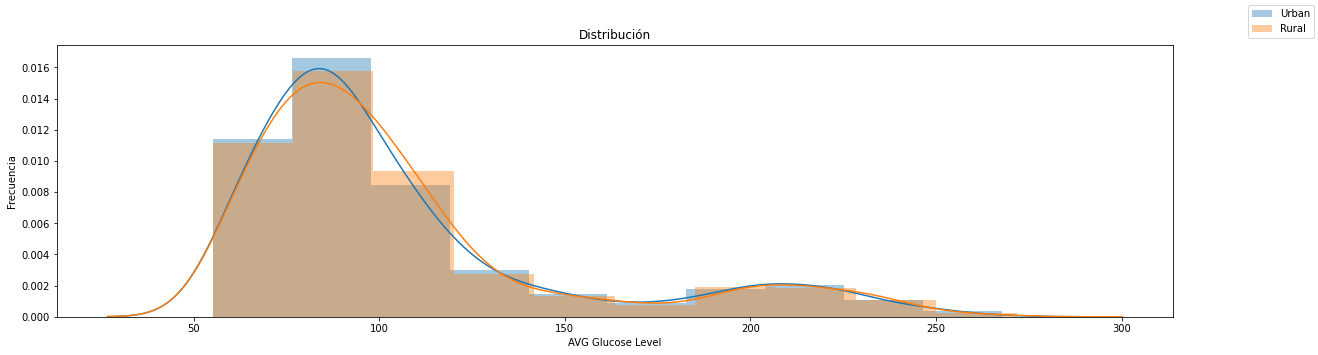

In [272]:
fig = plt.figure(figsize=(20,5))

sns.distplot(stroke_dataset[stroke_dataset.Residence_type == 'Urban'].avg_glucose_level, kde=True, hist=True, bins=10, label='Urban')
sns.distplot(stroke_dataset[stroke_dataset.Residence_type == 'Rural'].avg_glucose_level, kde=True, hist=True, bins=10, label='Rural')

fig.legend()
plt.xlabel('AVG Glucose Level')
plt.ylabel('Frecuencia')
plt.title('Distribución')

plt.show()

Se observan diferencias despreciables entre residentes urbanos y rurales con respecto a sus niveles de glucosa.

### Distribución entre los diferentes residencias de trabajo en función del BMI

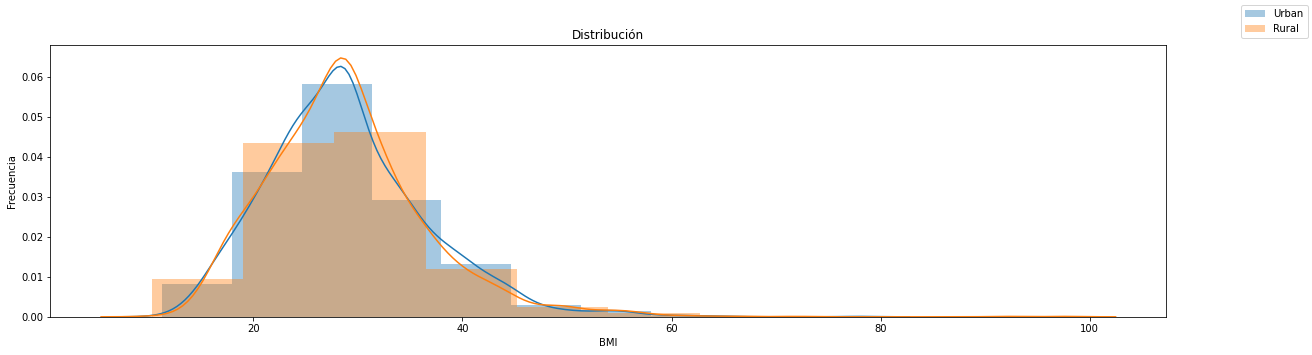

In [273]:
fig = plt.figure(figsize=(20,5))

sns.distplot(stroke_dataset[stroke_dataset.Residence_type == 'Urban'].bmi, kde=True, hist=True, bins=10, label='Urban')
sns.distplot(stroke_dataset[stroke_dataset.Residence_type == 'Rural'].bmi, kde=True, hist=True, bins=10, label='Rural')

fig.legend()
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.title('Distribución')

plt.show()

El BMI nos indica que tampoco no hay diferencias de distribucion con respecto a la zona de residencia.

### Análisis del tipo de trabajo con relacion a glucosa y BMI

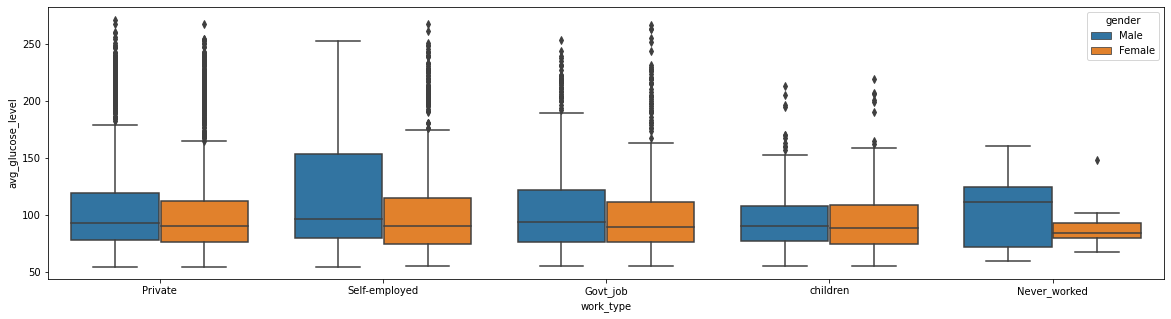

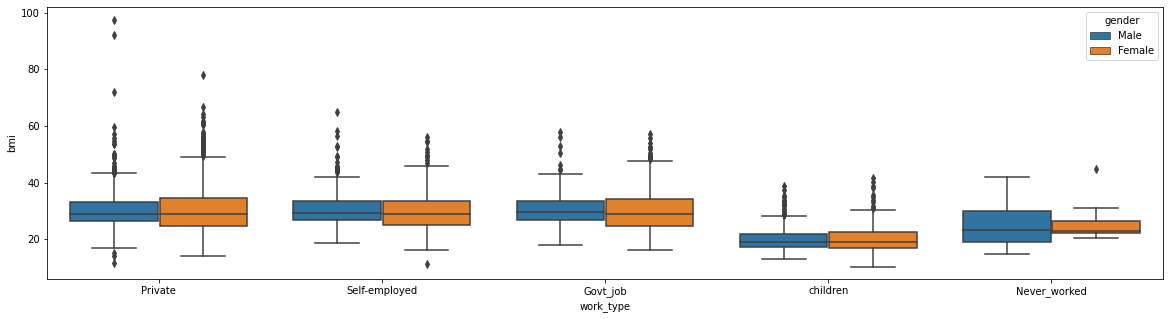

In [274]:
plt.figure(figsize=(20,5))
sns.boxplot(x='work_type',y="avg_glucose_level",data=stroke_dataset,hue='gender')
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(x='work_type',y="bmi",data=stroke_dataset,hue='gender')
plt.show()

### Análisis del Smoking Status con relacion a glucosa y BMI

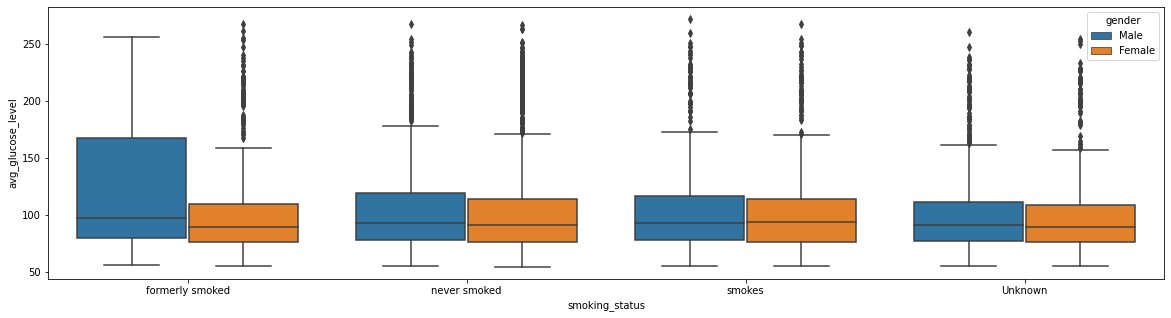

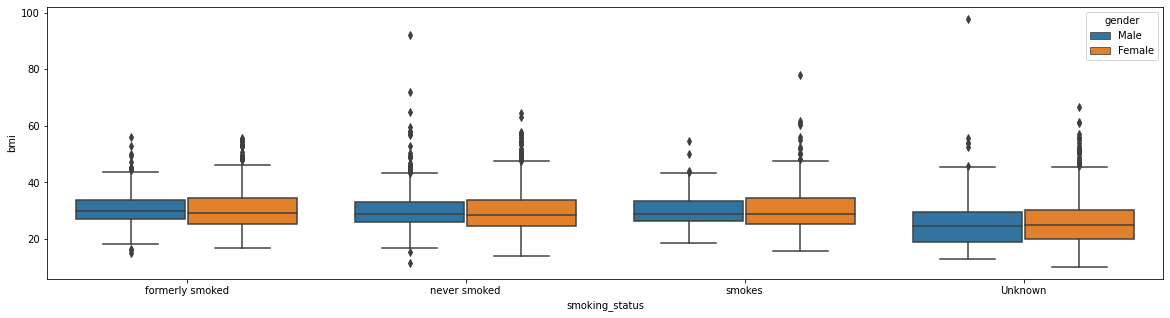

In [275]:
plt.figure(figsize=(20,5))
sns.boxplot(x='smoking_status',y="avg_glucose_level",data=stroke_dataset,hue='gender')
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(x='smoking_status',y="bmi",data=stroke_dataset,hue='gender')
plt.show()

### Análisis en función de donde vive la gente

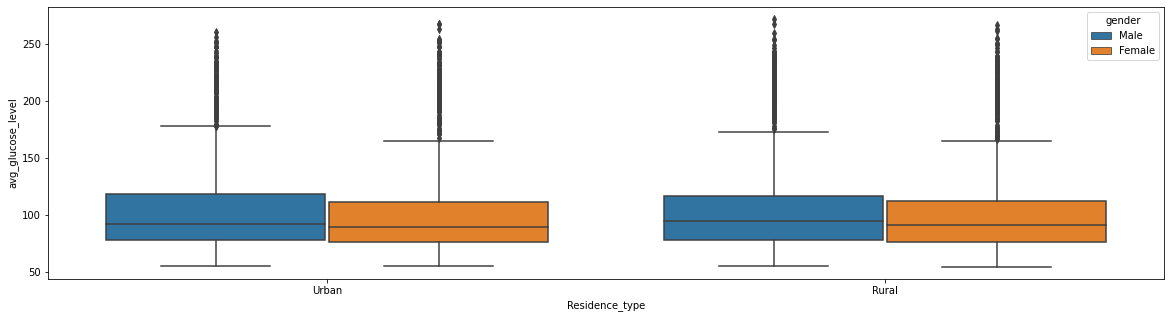

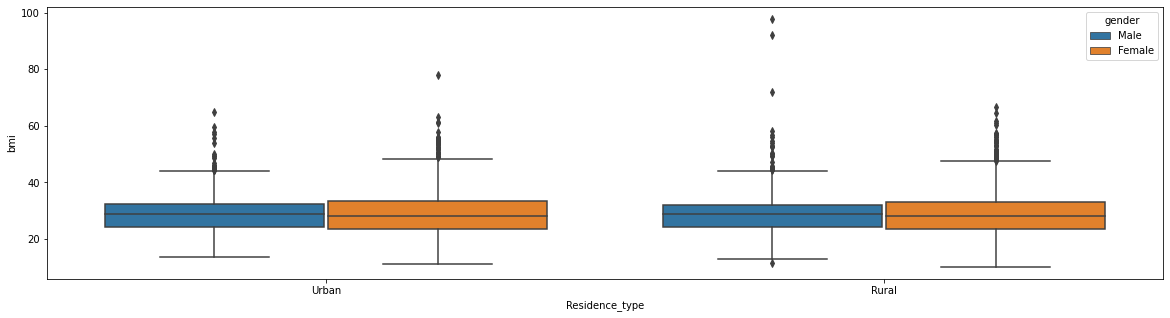

In [276]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Residence_type',y="avg_glucose_level",data=stroke_dataset,hue='gender')
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(x='Residence_type',y="bmi",data=stroke_dataset,hue='gender')
plt.show()

# Modelos de clasificacion

Un modelo de clasificación nos permite poder clasificar datos en un conjunto finito de categorias. En contraste con los de regresión, no se busca predecir un numero real.\
El objetivo es predecir un resultado de caracter binario, es decir si es hombre/mujer, gator/perro, ganador/noganador, etc. En nuestro caso, el resultado categorico que queremos predecir es si No va a sufrir un Stroke (ACV), o si.

#### Antes de comenzar con el modelo, debemos hacer algunos ajustes en el dataset. 
Los modelos de clasificacion requieren convertir las variables categoricas en variables numericas, que catalogamos como "dummies".\
Este procedimiento nos permite utilizar dichas variables en los modelos, que solo aceptan inputs numericos. Por lo que debemos reconvertir las variables categoricas que utilizamos para los graficos, en numericas.

In [277]:
stroke_dataset.stroke = stroke_dataset.stroke.replace({'Non-Stroke':0,'Stroke':1})
stroke_dataset.heart_disease = stroke_dataset.heart_disease.replace({'No':0,'Yes':1})
stroke_dataset.hypertension = stroke_dataset.hypertension.replace({'No':0,'Yes':1})
stroke_dataset["gender"].replace({"Male": 1, "Female": 0}, inplace=True)
stroke_dataset["Residence_type"].replace({"Rural": 0, "Urban": 1}, inplace=True)
stroke_dataset["ever_married"].replace({"Yes": 1, "No": 0}, inplace=True)

stroke_dataset = pd.get_dummies(stroke_dataset, columns=['smoking_status'])
stroke_dataset = stroke_dataset.drop("smoking_status_Unknown", axis = 1)
stroke_dataset = pd.get_dummies(stroke_dataset, columns=['work_type'])
stroke_dataset = stroke_dataset.drop("work_type_Never_worked", axis = 1)

In [278]:
stroke_dataset.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,stroke,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,1,36.600000,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,1,28.893237,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,1,32.500000,0,1,0,0,1,0,0
3,0,49.0,0,0,1,1,171.23,1,34.400000,0,0,1,0,1,0,0
4,0,79.0,1,0,1,0,174.12,1,24.000000,0,1,0,0,0,1,0


#### Procedemos a separar el dataset de la variable objetivo

In [279]:
X = stroke_dataset.drop(["stroke"], axis=1)
y = stroke_dataset["stroke"]

#### Ahora separamos en los sets de entrenamiento y prueba

In [280]:
(X_train, X_test,
 y_train, y_test) = train_test_split(X,
                            y,
                            stratify=y,
                            test_size=0.20,
                            random_state=11)

Utilizaremos el 20% de nuestro dataset para entrenar el modelo, y al seleccionar el mismo random_state para todos los modelos, podemos ser homogeneos en la capacidad de prediccion de cada modelo. Ya que todos van a tratar con el mismo subset de datos.

### Vamos a utilizar distintos modelos de clasificacion.

#### Aclaraciones Generales

##### Aclaraciones sobre la Matriz de Confusion

La matriz esta invertida.\
Si es True Negative (1er cuadrante), estimo un No Stroke, cuando no lo era.\
Si es False Positive (2do cuadrante), estimo un Stroke, cuando no lo era.\
Si es False Negative (3er cuadrante), estimo un No Stroke, cuando lo era.\
Si es True Positive (4to cuadrante), estimo un Stroke, cuando era Stroke.

##### Aclaraciones sobre ROC Curve Analisis

Una curva de ROC curves delinea los positivos verdaderos en el eje "Y", y los falsos positivos en el eje "X".\
Es una herramienta grafica que nos ayuda a observar la efectividad del modelo.\
La zona superior izquierda es la zona "ideal", donde la tasa de falsos positivos es cero, y la tasa de positivos verdaderos es uno.

### KNN (K-Nearest Neighbour)

Este modelo de Machine Learning supervisado utiliza un concepto de determinacion en el environment. Los valores de los data points, se determinan por los data points cercanos. Haciendo una analogia para entender el concepto, las personas son afectadas, influenciadas, por las personas que los rodean.
El modelo mide la distancia entre los distintos data points, y los agrupa en base a clases. Los puntos de dichas clases, tienen una gran cantidad de caracteristicas en comun, por eso son agrupados dentro de esas especificas clases. Es importante conocer bien el dataset y realizar las visualizaciones correctas, para entender cuantas clases existen dentro de nuestro dataset. De dicha manera vamos a poder realizar una clasificacion mas fidedigna.

In [281]:
model1 = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)
print("Accuracy for our training dataset is : {:.2f}%".format(model1.score(X_test, y_test)*100) )

Accuracy for our training dataset is : 95.11%


Confusion Matrix:
[[972   0]
 [ 50   0]]


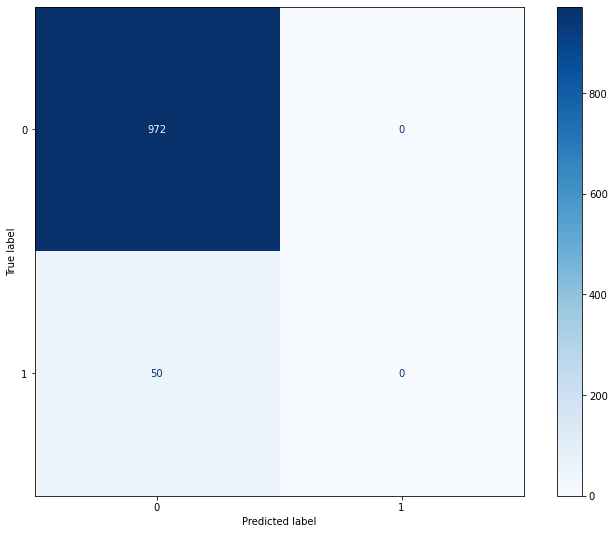

In [282]:
#Matriz de Confusión
y_test_pred = model1.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(model1, X_test, y_test, normalize = None, cmap = 'Blues')
plt.show()

In [283]:
frequencyTable(stroke_dataset, 'stroke')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
0,4860,4860,95.1262,95.1262
1,249,5109,4.8738,100.0000


In [284]:
y_test.value_counts()

0    972
1     50
Name: stroke, dtype: int64

##### ROC Curve K-Nearest Neighbor 

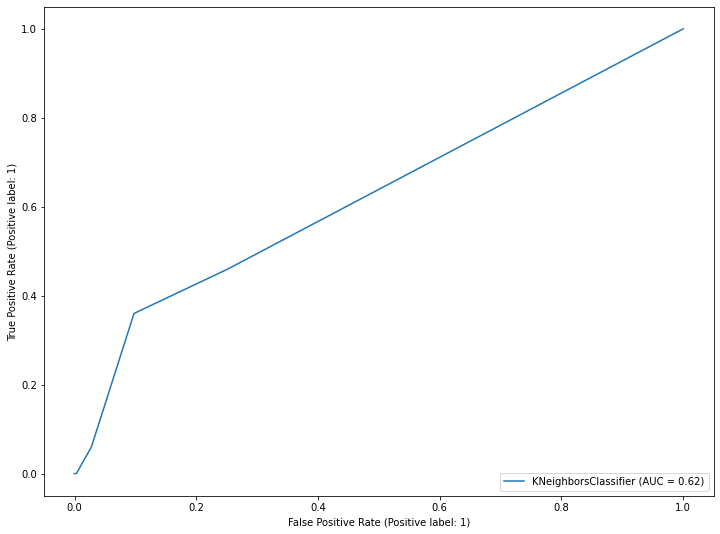

In [285]:
knn_disp = RocCurveDisplay.from_estimator(model1, X_test, y_test)
plt.show()

#### Conclusiones de KNN

De la matriz de confusion podemos extraer algunas conclusiones. Cuando realizamos el train test split, seleccionamos al azar, el 20% de nuestro data set.\
Nuestro modelo es muy efectivo en la prediccion  de True Negatives, ya que obtenemos un 95.11%. Son casos en lo que predecimos un No Stroke, y el dataset confirma nuestra estimacion.\
Observando el dataset, y la proporcion de Stroke/No Stroke, en conjunto con la matriz de confusion, podemos dilucidar una limitacion del modelo. La limitacion reside en el caso de los False Negative (3er cuadrante), estimo un No Stroke, cuando Si lo era. Esta metrica es muy importante, dado que siempre que realmente una persona sufra un Stroke, el modelo debe predecirlo para tratar y prevenir.\
Hay 50 casos de este tipo en el subset que utilizamos para entrenar el modelo, y no pudimos predecir ninguno.\
Esta limitacion genera un riesgo de salud, si se utilizara este modelo como input en un Hospital, ya que no tiene la capacidad de realmente predecir un Stroke en las situaciones en las que sucede.\
La curva ROC lo demuestra. Cuando el valor de AUC es aproximadamente 0.5, el model no tiene la capacidad de distinguir entre clases positivas y negativas.

#### Un metodo para mejorar la accuracy del modelo, es analizar exhaustivamente la cantidad de KNeighbors (hyperparameters) a elegir en base a las caracteristicas de nuestro dataset.

GridSearchCV es una herramienta que nos permite realizar especificamente esa tarea.

Al programa le definimos un valor de K entre 1 y 100. Debido a que KNN es computacionalmente intenso, y lento mientras aumenta la base de datos, limita el approach y nos obliga a realizar una cantidad sensata de folds.

In [286]:
model2 = KNeighborsClassifier().fit(X_train, y_train)
k_range = list(range(1, 100))
param_grid = dict(n_neighbors = k_range)
grid = GridSearchCV(model2, param_grid, cv=10, scoring='accuracy', return_train_score= False, verbose=1)
  
# Fitting for grid search
grid_search = grid.fit(X_train, y_train)

Fitting 10 folds for each of 99 candidates, totalling 990 fits


In [287]:
print(grid_search.best_params_)

{'n_neighbors': 16}


Entre todos los valores de K, el mejor parametro es 16.

In [288]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.91094432 0.94372693 0.93565248 0.94690481 0.94323553 0.94788461
 0.94543842 0.94984179 0.9491083  0.95033079 0.95033079 0.95082039
 0.95057529 0.95106489 0.95106489 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.9513

In [289]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9513093868354188
{'n_neighbors': 16}
KNeighborsClassifier(n_neighbors=16)


Text(0, 0.5, 'Cross-Validated Accuracy')

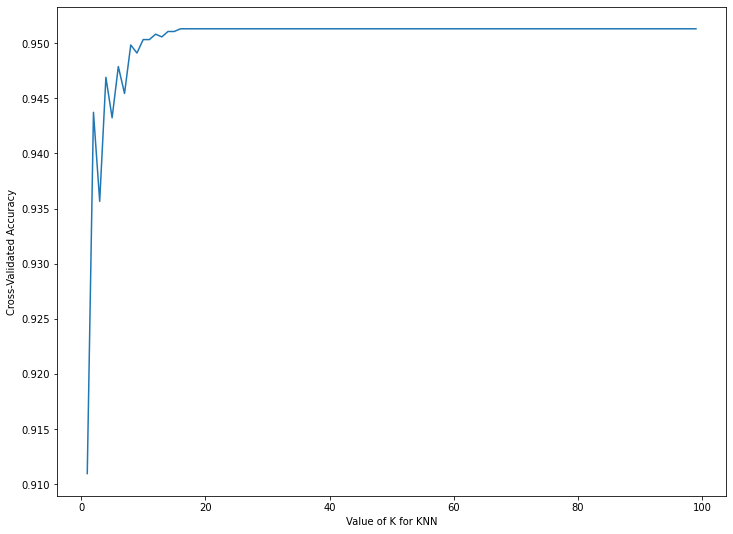

In [290]:
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [291]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

Accuracy for our training dataset with tuning is : 95.13%


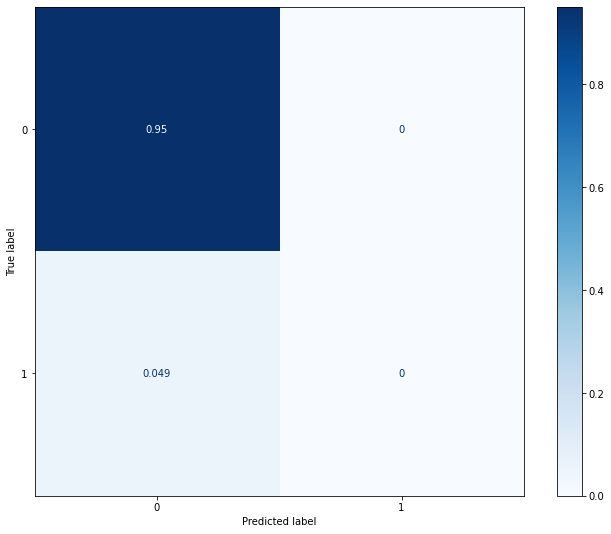

In [292]:
plot_confusion_matrix(grid,X_train, y_train,normalize = 'all', cmap = 'Blues' )

Podemos ver una mejora en la capacidad de prediccion modelo, ya que obtenemos un 95.13% de True Negatives, casos en lo que predecimos un No Stroke, y el dataset confirma nuestra estimacion. La mejora porcentual en la estimacion no implica un cambio nominal debido a que una mejora del 0.02%, en un subdataset de tan pocos individuos, no es significativo.

### Decision Tree

El concepto del modelo de Arboles de Decision (Decision Trees), es construir un arbol de nodes y branches, que constan de informacion y decisiones acorde a cual es el mejor camino para ajustar nuestro train set para lograr la mejor prediccion. Se construyen separando recursivamente nuestro train-set usando los features que mejor ajustan para nuestro objetivo.

##### Primero creamos un arbol de decisión sencillo, lo entrenamos y realizamos las predicciones.

In [293]:
#Creamos un arbol de decisión sencillo y lo fiteamos
tree = DecisionTreeClassifier(random_state=11)

tree.fit(X_train, y_train)

tree_test_pred = tree.predict(X_test)

test3_accuracy = accuracy_score(y_test, tree_test_pred)
print("Accuracy for our training dataset with Decision Tree is : {:.2f}%".format(test3_accuracy*100))

Accuracy for our training dataset with Decision Tree is : 90.22%


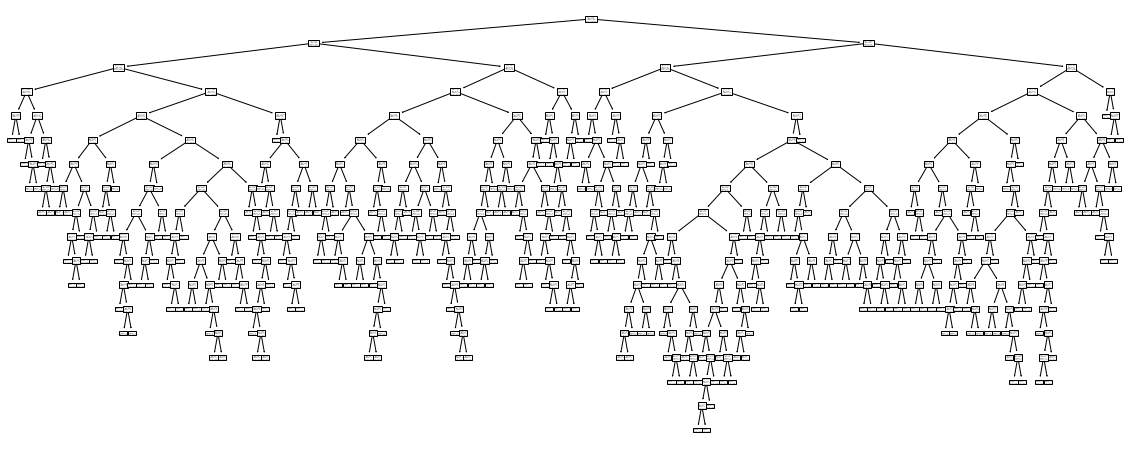

In [294]:
plt.figure(figsize=(20, 8), edgecolor = 'blue')
plot_tree(tree)
plt.show()

Confusion Matrix:
[[917  55]
 [ 45   5]]


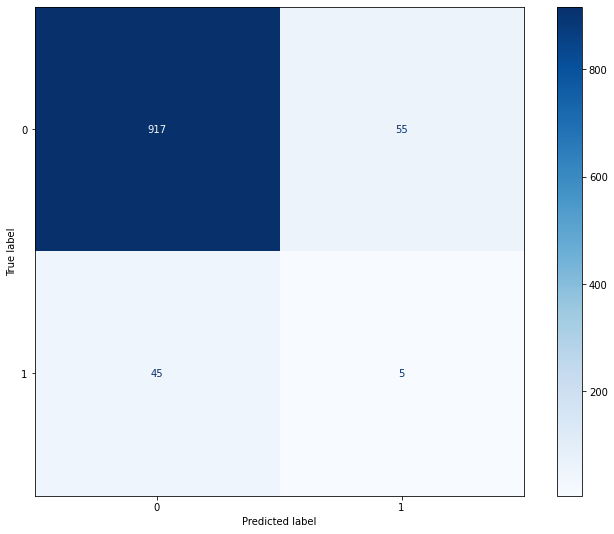

In [295]:
#Matriz de Confusión
print("Confusion Matrix:")
print(confusion_matrix(y_test, tree_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(tree, X_test, y_test, normalize = None, cmap = 'Blues')
plt.show()

##### ROC Curve Decision Tree

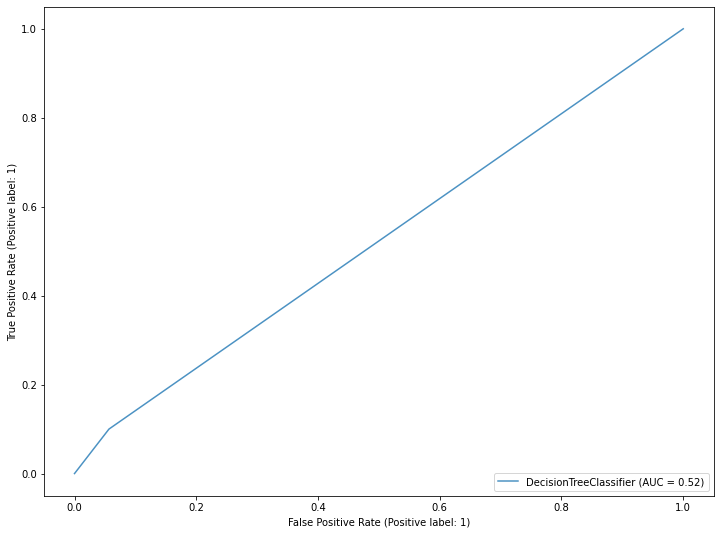

In [296]:
ax = plt.gca()
dtc_disp = RocCurveDisplay.from_estimator(tree, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

#### Conclusiones Decision Tree

La capacidad de prediccion de True Negatives es del 90.22%, casos en lo que predecimos un No Stroke, y el dataset confirma nuestra estimacion (1er cuadrante).\
Y los casos en los que predecimos un Stroke, y el dataset lo confirma (4to cuadrante).\
La limitacion esta en un elemento importante que nos demuestra la matriz de confusion. En 45 casos, el Arbol de Decision predice que esas personas No sufriran un Stroke, cuando realmente si lo sufren. Esta metrica es muy importante, define si nuestro modelo es capaz de predecir los casos de Stroke verdaderos. Ya sea porque predice un No stroke y No sucede (1er cuadrante), o porque predice un Stroke y sucede (4to cuadrante).\
Seguimos observando la limitacion de nuestros modelos en dicho caso.\
La curva ROC lo demuestra. Cuando el valor de AUC es aproximadamente 0.5, el model no tiene la capacidad de distinguir entre clases positivas y negativas.

### RandomForest

Random forest consiste en una gran cantidad de decision trees individual que operan como un ensemble. Cada tree individual define su prediccion de clase, y la clase con mas votos entre todos los arboles individuales, se vuelve la prediccion de nuestro modelo Random Forest.

In [297]:
#Creamos un random forest!
model3 = RandomForestClassifier(random_state=11,
                                n_estimators=200,
                                class_weight="balanced",
                                max_features="log2")
model3.fit(X_train, y_train)

y_test_pred = model3.predict(X_test)

test3_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy for our training dataset with RandomForest is : {:.2f}%".format(test3_accuracy*100))

Accuracy for our training dataset with RandomForest is : 94.81%


In [298]:
print("Classification Report")
print(classification_report(y_test, y_test_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



Confusion Matrix:
[[969   3]
 [ 50   0]]


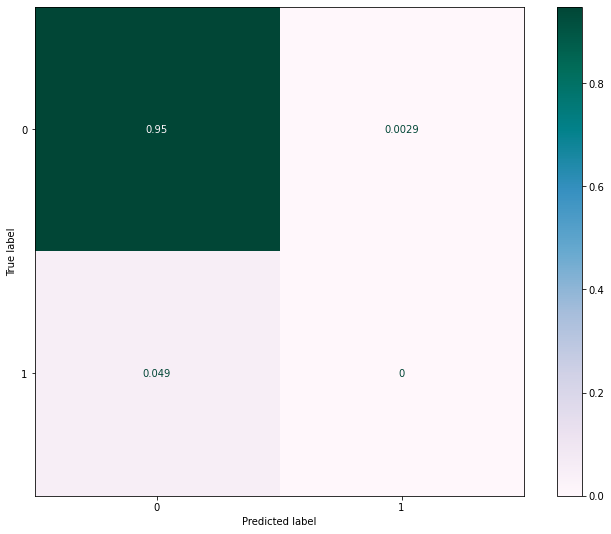

In [299]:
#Matriz de Confusión
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(model3, X_test, y_test, normalize = 'all' , cmap = 'PuBuGn')
plt.show()

##### ROC Curve RandomForest

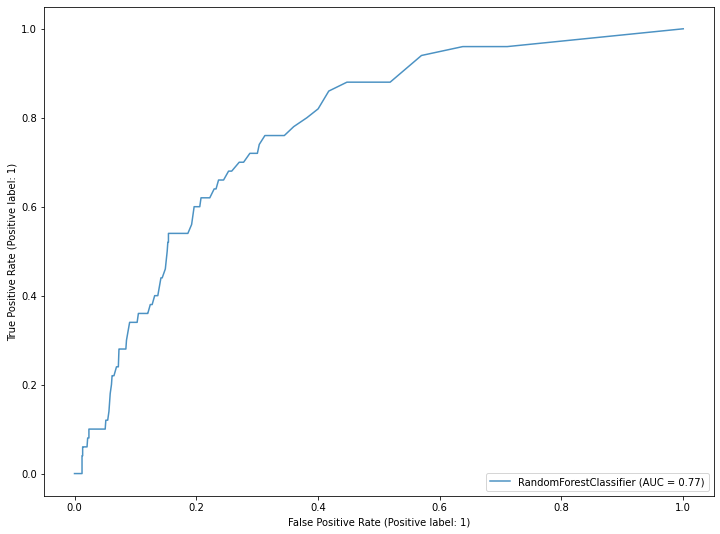

In [300]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(model3, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

#### Conclusiones RandomForest

De la matriz de confusion podemos extraer algunas conclusiones.\
Nuestro modelo es muy efectivo en la prediccion de True Negatives, ya que obtenemos un 94.81%, casos en lo que predecimos un No Stroke, y el dataset confirma nuestra estimacion.\
En este caso incurrimos en el error de False Positives con 3 individuos. Es el caso de estimar un Stroke, cuando no lo era. Esta limitacion no genera ningun riesgo de salud, ya que solo recaeria en gastos y atencion extra. A diferencia del KNN, este modelo si incurre en ese error.\
Comparado con Decision Tree, una mejoria en la capacidad de no incurrir en False Positives, estimar un Stroke cuando no lo era (55 DS vs 3 RF). Pero mas importante aun es observar que perdemos toda capacidad de predecir True Positives, casos en los que predecimos un Stroke, y se verifica (5 DS vs 0 RF).\
La curva ROC tiene una mejor pendiente, pero no es congruente con la matriz de confusion.

### Gradient Boosting Classifier

Gradient Tree Boosting Classifier es un modelo que nace del metodo de boosting, que consiste en crear un ensemble. Empieza por fittear un modelo inicial (en este caso un arbol de decision) a nuestra data. El segundo modelo se enfoca en predecir adecuadamente en los casos en los que el primer modelo tiene un mal rendimiento. Se espera que la combinacion de ambos modelos tenga un mejor rendimiento. Este proceso se repite, y cada modelo sucesivo intenta corregir las limitaciones de todos los anteriores.

In [301]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    model3GB = GradientBoostingClassifier(n_estimators=200,
                                          learning_rate=learning_rate,
                                          max_depth=1,
                                          random_state=11).fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(model3GB.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(model3GB.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.951
Accuracy score (validation): 0.951
Learning rate:  0.075
Accuracy score (training): 0.951
Accuracy score (validation): 0.951
Learning rate:  0.1
Accuracy score (training): 0.951
Accuracy score (validation): 0.950
Learning rate:  0.25
Accuracy score (training): 0.951
Accuracy score (validation): 0.951
Learning rate:  0.5
Accuracy score (training): 0.952
Accuracy score (validation): 0.951
Learning rate:  0.75
Accuracy score (training): 0.953
Accuracy score (validation): 0.950
Learning rate:  1
Accuracy score (training): 0.954
Accuracy score (validation): 0.951


In [302]:
model3GB = GradientBoostingClassifier(n_estimators=200,
                                      learning_rate=1.0,
                                      max_depth=1,
                                      random_state=11).fit(X_train, y_train)

In [303]:
y_test_predGB =model3GB.predict(X_test)
test3_accuracyGB = accuracy_score(y_test, y_test_predGB)
print("Accuracy for GBC is : {:.2f}%".format(test3_accuracyGB*100))

Accuracy for GBC is : 95.11%


In [304]:
print("Classification Report")
print(classification_report(y_test, y_test_predGB))

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.50      0.04      0.07        50

    accuracy                           0.95      1022
   macro avg       0.73      0.52      0.52      1022
weighted avg       0.93      0.95      0.93      1022



In [305]:
n_zeros3GB = np.count_nonzero(y_test==0)
n_ones3GB = np.count_nonzero(y_test==1)
# display the count of zeros
print(n_zeros3GB)
print(n_ones3GB)
print(n_zeros3GB+n_ones3GB)

972
50
1022


Confusion Matrix:
[[970   2]
 [ 48   2]]


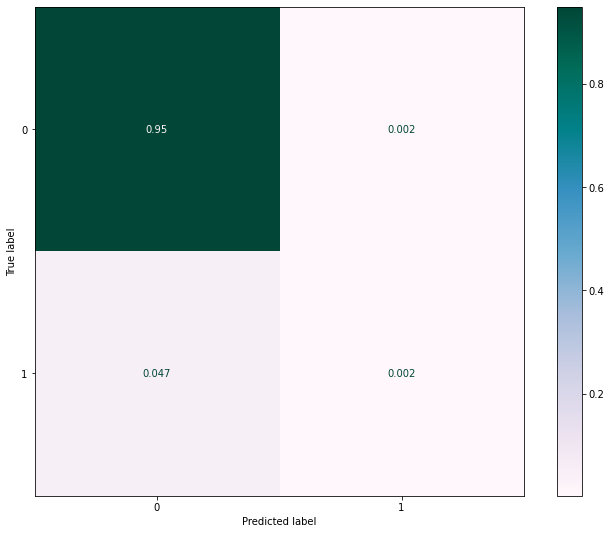

In [306]:
#Matriz de Confusión
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predGB))

#Ploteamos la Matriz
plot_confusion_matrix(model3GB, X_test, y_test, normalize = 'all' , cmap = 'PuBuGn')
plt.show()

##### ROC Curve Gradient Boosting Classifier

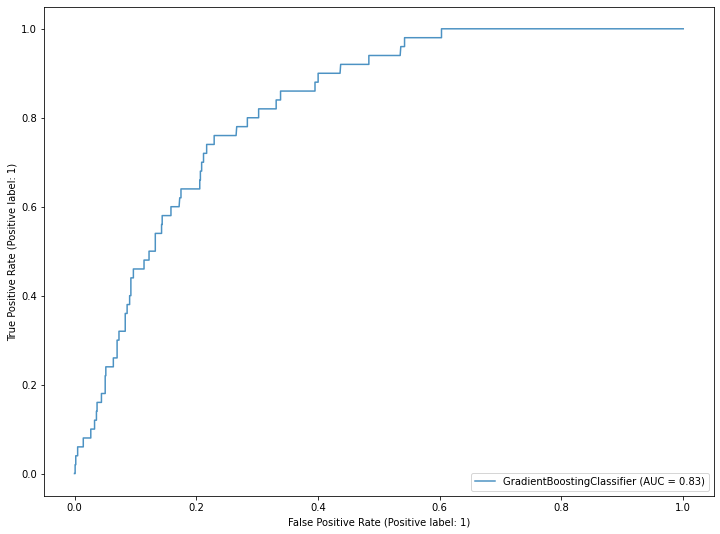

In [307]:
ax = plt.gca()
gbc_disp = RocCurveDisplay.from_estimator(model3GB, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

#### Conclusiones GBC (Gradient Boosting Classifier)

Junto con Decision Trees y Random Forest, GBC tambien incurre en el error de False Positive, situacion en la cual predecimos un Stroke, cuando no sucede. Esta metrica es relativamente importante, dada la importancia de predecir todos los casos verdaderos en los que una persona realmente Stroke. Se disminuye ligeramente dicho error, ya que solo observamos 2 casos.\
Es muy eficiente en la situacion de True Negatives (95.11%), casos en lo que predecimos un No Stroke, y el dataset confirma nuestra estimacion (1er cuadrante).\
A diferencia de Random Forest, este modelo si logra predecir 2 casos de True Positive, individuos que predecimos que tendran un Stroke, y se verifica.\
De todas maneras seguimos observando la limitacion de nuestros modelos en este caso. De 50 individuos que sufriran un Stroke, solo podemos predecir 2.

### SVC (Support Vector Classification)

Creamos el modelo SVM (support vector machine). Un support vector machine construye un hyper-plano, o una serie de hyper-planos en n dimensiones, que podemos utilizar para nuestro analisis de clasificacion. La matematica del modelo determina el mejor conjunto de vectores los cuales maximizan el margen entre los vectores (es decir maximizan la distancia entre los inputs y sus subclases) sin incurrir en misclasificar dicho sample, es decir sin adjudicar ese input en una subclase no optima.

In [308]:
X4 = stroke_dataset.drop(["stroke"], axis=1)
Y4 = stroke_dataset["stroke"]

X4_train, X4_test, Y4_train, Y4_test = train_test_split(
                                        X4,
                                        Y4.values.reshape(-1,1),
                                        train_size   = 0.2,
                                        random_state = 11,
                                        shuffle      = True
                                        )

In [309]:
model4 = SVC(C = 100, kernel = 'rbf', random_state=11)
model4.fit(X4_train, Y4_train)

SVC(C=100, random_state=11)

In [310]:
n_zeros4 = np.count_nonzero(Y4_train==0)
n_ones4 = np.count_nonzero(Y4_train==1)
# display the count of zeros
print(n_zeros4)
print(n_ones4)
print(n_zeros4+n_ones4)

976
45
1021


In [311]:
Y4_train_pred = model4.predict(X4_train)
test4_accuracy = accuracy_score(Y4_train, Y4_train_pred)

# Accuracy
print("Accuracy of SVC is : {:.2f}%".format(test4_accuracy*100))

Accuracy of SVC is : 95.59%


Confusion Matrix:
[[976   0]
 [ 45   0]]


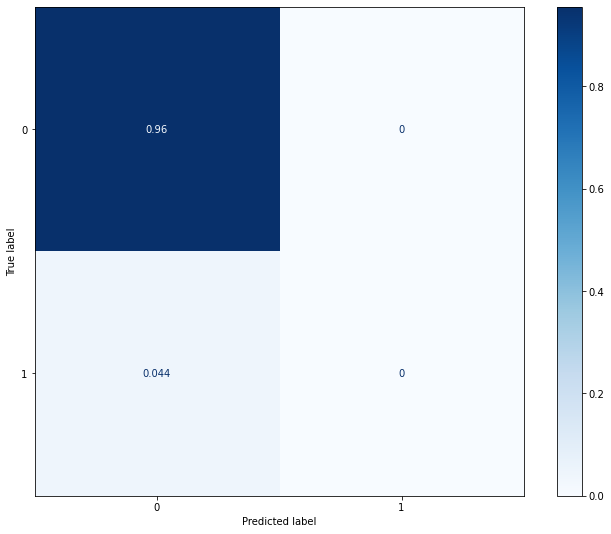

In [312]:
#Matriz de Confusión
print("Confusion Matrix:")
print(confusion_matrix(Y4_train, Y4_train_pred))

#Ploteamos la Matriz
plot_confusion_matrix(model4, X4_train, Y4_train, normalize = 'all' , cmap = 'Blues')
plt.show()

##### ROC Curve Support Vector Classification

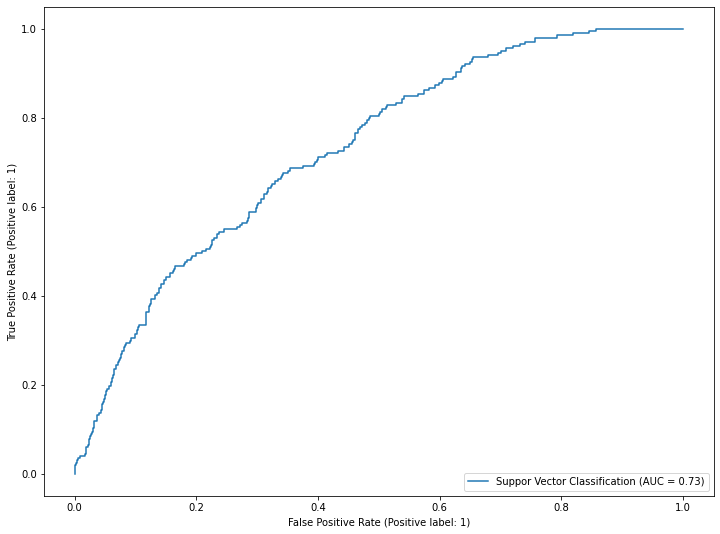

In [313]:
svc_disp = RocCurveDisplay.from_estimator(model4, X4_test, Y4_test, name ='Suppor Vector Classification')
plt.show()

#### Conclusiones SVC

Habiamos aclarado que la limitaciones de nuestras predicciones residen en el caso de los True Positive (4to cuadrante). Casos en los que predecimos un Stroke, y de hecho sufren un Stroke.\
El modelo SVC, continua con esa limitacion.\
Mejora la capacidad de prediccion de los True Negatives, casos en lo que predecimos un No Stroke, y el dataset confirma nuestra estimacion.\
Por ende no incurre en el error de False Positives, situacion en la cual predecimos un Stroke, cuando se da un No Stroke. 

### Conclusion de Modelos de Machine Learning

Utilizamos varios modelos de clasificacion.

1. KNN (K-Nearest Neighbor)
2. Decisition Tree
3. Random Forest
4. Gradient Boosting Classifier
5. SVC (Support Vector Classification)

Luego de implementar cada uno, realizamos los debidos analisis. La conclusion final es que el metodo GBC (Gradient Boosting Classifier) es el que obtiene mejores resultados.

In [314]:
print("Accuracy for GBC is : {:.2f}%".format(test3_accuracyGB*100))

Accuracy for GBC is : 95.11%


In [315]:
print("Confusion Matrix GBC:")
print(confusion_matrix(y_test, y_test_predGB))

Confusion Matrix GBC:
[[970   2]
 [ 48   2]]


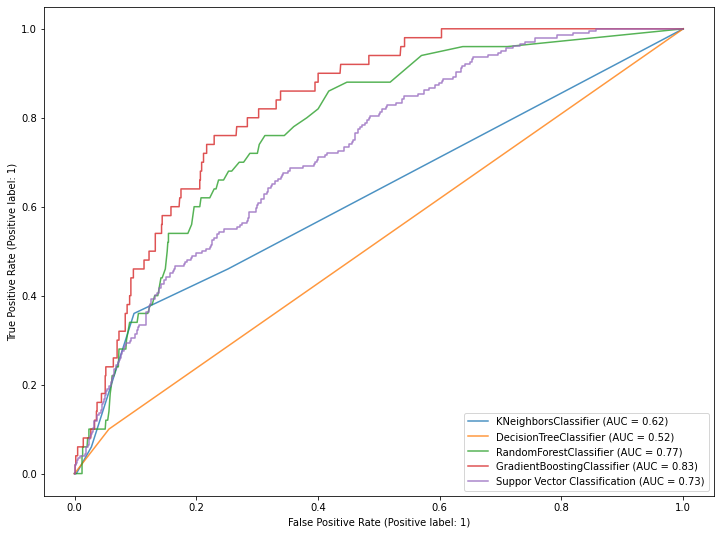

In [316]:
ax = plt.gca()
knn_disp.plot(ax=ax, alpha=0.8)
dtc_disp.plot(ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
gbc_disp.plot(ax=ax, alpha=0.8)
svc_disp.plot(name = 'Suppor Vector Classification' ,ax=ax, alpha=0.8)

plt.show()

En todos los modelos obtuvimos resultados similares, lo que nos permitio observar la limitacion de nuestras predicciones, que siempre reside en el caso de los True Positives. Casos en los que el predict de un Stroke, coincide con el true Stroke.\
De todos los modelos, Decision Tree fue el que tuvo una mejor capacidad de predecir los True Positives (5 DS vs 2 GBC), pero incurre mucho en el error de False Positives, en el cual estimo un Stroke, cuando no lo era (55 DS vs 2 GBC).
El modelo GBC no es el de mejor capacidad de prediccion de los True Negatives, pero por un margen muy ligero (GBC 970 vs SVC 976).\
Si es el modelo de mejor curva ROC (AUC area under curve). La curva ROC es curva de probabilidades que grafica el ratio de verdaderos positivos contra lo falsos positivos, en varios threshold values.
Observando todos los modelos, sus curvas ROC, y ponderando sus limitaciones, creemos que en la mayoria de los casos, GBC deberia ser el que mejor ajuste.

# Adecuacion del dataset y Modelos de Clasificacion con Analisis de hiperparametros

Al realizar el analisis y arribar a las conclusiones, pudimos observar que el problema del resultado de los modelos, está en el sampling. Nuestro dataset contiene muy pocos individuos que sufren un Stroke, menos del 5% de todo el dataset. Por lo que consideramos que para lograr un analisis mas significativo de que modelo ajustaria mejor, dado el caso de contener un dataset con estas caracteristicas, seria realizar algun ajuste con el sampling de nuestra muestra.

#### Un elemento que ayudaria al analisis de los modelos, seria reajustar la escala de las variables

Standard Scaling:\
Estandarizar un conjunto de datos implica reescalar la distribución de valores para que la media de los valores observados sea 0 y la desviación estándar sea 1. Es util aplicarlo en nuestro data set, debido a que tenemos valores en diversas escalas. Muchas caracteristicas se presentan en valor binario. Otras variables como 'avg_glucose_level', tienen una escala entre 5-277, o como 'bmi', que tiene valores entre 10 y 98. Realizar una estandarizacion nos permite reescalar todas las variables para que tengan una ponderacion similar.

In [317]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### SMOTE como tecnica de sampling

SMOTE (Synthetic Minority Oversampling Technique) es una tecnica de oversampling donde samples sinteticas son generadas para una clase minoritaria. Este algoritmo ayuda a compensar el problema de overfitting causado por oversampling random.

In [318]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=11)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 199
Before OverSampling, counts of label '0': 3888 

After OverSampling, the shape of train_X: (7776, 15)
After OverSampling, the shape of train_y: (7776,) 

After OverSampling, counts of label '1': 3888
After OverSampling, counts of label '0': 3888


El algoritmo genero un nuevo conjunto de datos sinteticos en el cual todos los individuos sufren un Stroke. De esta manera tenemos un dataset que contiene 50% de individuos que sufren un Stroke, y 50% de individuos que no sufren un Stroke.

### Metricas a destacar para el Analisis de nuestro modelos (con SMOTE realizado)

1) Recall:\
Es la habilidad del modelo de encontrar todos los casos relevantes.\
Matematicamente, definimos recall como el numero de true positives, dividido por el number de True Positives mas el numero de False Negatives.

-------------------------------
2) Accuracy:\
Es la habilidad del modelo de encontrar los casos acertados sobre todas las predicciones.
Matematicamente representa el ratio de la suma entre True Positives + True Negatives sobre la suma de todas las predicciones.\
Accuracy = True Positives + True Negatives / True Positives + False Positives+ True Negatives + False Negatives 
            
-------------------------------

3) Precision:\
La habilidad del modelo de clasificacion para clasificar solo los data points relevantes.\
Matematicamente la precision representa el numero de True Positives dividido sobre True Positives mas el numbero de False Positives.

-------------------------------

4) F1:\
Es la media armónica de precisión y el recall. 
Matematicamente es\
F1 = 2*Recall*Precision / Recall + Precision

### Modelos de Clasificacion para Analisis

Utilizamos los mismos modelos que en el analisis anterior, y le agregamos dos:
1) Regresion logistica
2) KNeighbors
3) Decision Tree
4) Random Forest
5) Gradient Boosting Classifier
6) Support Vector Classification
7) XGBoost

### Modelos con SMOTE aplicado

In [319]:
models = []
models.append(['Logistic Regression', LogisticRegression(random_state=11)])
models.append(['KNeighbors', KNeighborsClassifier(n_neighbors=8)])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=11)])
models.append(['Random Forest', RandomForestClassifier(random_state=11,
                                                       n_estimators=200,
                                                       class_weight="balanced",
                                                       max_features="log2")])
models.append(['GradientBoostingClassifier', GradientBoostingClassifier(n_estimators=200,
                                                        learning_rate=1.0,
                                                        max_depth=1,
                                                        random_state=11)])
models.append(['Support Vector Classification', SVC(C = 100, 
                                                    kernel = 'rbf',
                                                    random_state=11)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train_res, y = y_train_res, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regression :
[[725 247]
 [ 14  36]]
Accuracy Score:  0.7446183953033269

K-Fold Validation Mean Accuracy: 78.73 %

Standard Deviation: 1.48 %

ROC AUC Score: 0.73

Precision: 0.13

Recall: 0.72

F1: 0.22
-----------------------------------

KNeighbors :
[[778 194]
 [ 32  18]]
Accuracy Score:  0.7788649706457925

K-Fold Validation Mean Accuracy: 90.11 %

Standard Deviation: 0.71 %

ROC AUC Score: 0.58

Precision: 0.08

Recall: 0.36

F1: 0.14
-----------------------------------

Decision Tree :
[[888  84]
 [ 36  14]]
Accuracy Score:  0.8825831702544031

K-Fold Validation Mean Accuracy: 90.65 %

Standard Deviation: 2.81 %

ROC AUC Score: 0.60

Precision: 0.14

Recall: 0.28

F1: 0.19
-----------------------------------

Random Forest :
[[910  62]
 [ 42   8]]
Accuracy Score:  0.898238747553816

K-Fold Validation Mean Accuracy: 96.08 %

Standard Deviation: 2.11 %

ROC AUC Score: 0.55

Precision: 0.11

Recall: 0.16

F1: 0.13
-----------------------------------

GradientBoostingClassi

##### Generamos un DataFrame para poder visualizar todo el conjunto de modelos para su seleccion

In [320]:
dfSMOTE = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])
dfSMOTE['Accuracy'] = dfSMOTE['Accuracy'].div(100)
dfSMOTE['K-Fold Mean Accuracy'] = dfSMOTE['K-Fold Mean Accuracy'].div(100)
dfSMOTE.sort_values(by= ['Accuracy', 'Recall', 'K-Fold Mean Accuracy'], inplace= True, ascending= True)
dfSMOTE

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
0,Logistic Regression,0.744618,0.787297,1.480280,0.732942,0.127208,0.72,0.216216
1,KNeighbors,0.778865,0.901106,0.710104,0.580206,0.084906,0.36,0.137405
4,GradientBoostingClassifier,0.854207,0.878612,5.398265,0.600844,0.122137,0.32,0.176796
5,Support Vector Classification,0.855186,0.937888,1.369396,0.553930,0.091667,0.22,0.129412
2,Decision Tree,0.882583,0.906511,2.805091,0.596790,0.142857,0.28,0.189189
3,Random Forest,0.898239,0.960781,2.110151,0.548107,0.114286,0.16,0.133333
6,XGBoost,0.926614,0.955644,6.565044,0.544053,0.162162,0.12,0.137931


### GridSearchCV

Utilizando GridSearchCV, realizamos una optimizacion de los HiperParametros para poder mejorar nuestra clasificacion.

In [321]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'random_state':[11]}]),
               (KNeighborsClassifier(),[{'n_neighbors':[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]),
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[11]}]),
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[11]}]),
               (GradientBoostingClassifier(),[{'n_estimators':[100,150,200],'max_depth':[0.5,1],'learning_rate': [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1],'random_state':[11]}]),
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[11]}]), 
               (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1, 0.5, 1], 'eval_metric': ['error'],'random_state':[11]}])
              ]

### GridSearchCV Recall

Vamos a ponderar los hiperparametros de los modelos segun su mejor valor de Recall.
Creemos que dada la dificultad de poder estimar cuando una persona va a sufrir un Stroke, deberiamos concentrarnos en obtener el mejor score Recall.

In [322]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i, param_grid = j, scoring = 'recall' ,cv = 10)
    grid.fit(X_train_res, y_train_res)
    best_recall = grid.best_estimator_
    best_param = grid.best_params_
    print('{}:\nBest Recall : {:.2f}%',best_recall)
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

{}:
Best Recall : {:.2f}% LogisticRegression(C=0.25, random_state=11, solver='liblinear')
Best Parameters :  {'C': 0.25, 'random_state': 11, 'solver': 'liblinear'}

----------------

{}:
Best Recall : {:.2f}% KNeighborsClassifier(metric='euclidean', n_neighbors=7)
Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 7}

----------------

{}:
Best Recall : {:.2f}% DecisionTreeClassifier(criterion='entropy', random_state=11)
Best Parameters :  {'criterion': 'entropy', 'random_state': 11}

----------------

{}:
Best Recall : {:.2f}% RandomForestClassifier(n_estimators=150, random_state=11)
Best Parameters :  {'criterion': 'gini', 'n_estimators': 150, 'random_state': 11}

----------------

{}:
Best Recall : {:.2f}% GradientBoostingClassifier(learning_rate=0.25, max_depth=1, random_state=11)
Best Parameters :  {'learning_rate': 0.25, 'max_depth': 1, 'n_estimators': 100, 'random_state': 11}

----------------

{}:
Best Recall : {:.2f}% SVC(C=1, random_state=11)
Best Parameters :  {'C': 1

#### Modelos con mejor Recall Parameters

In [323]:
models = []
models.append(['Logistic Regression', LogisticRegression(C=0.25,
                                                         solver='liblinear',
                                                         random_state=11)])
models.append(['KNeighbors', KNeighborsClassifier(metric='euclidean', n_neighbors=7)])
models.append(['Decision Tree', DecisionTreeClassifier(criterion='entropy',
                                                       random_state=11)])
models.append(['Random Forest', RandomForestClassifier(random_state=11,
                                                       n_estimators=150,
                                                       criterion='gini')])
models.append(['GradientBoostingClassifier', GradientBoostingClassifier(n_estimators=100,
                                                        learning_rate=0.25,
                                                        max_depth=1,
                                                        random_state=11)])
models.append(['Support Vector Classification', SVC(C = 1, 
                                                    kernel = 'rbf',
                                                    random_state=11)])
models.append(['XGBoost', XGBClassifier(eval_metric='error',
                                        learning_rate=0.1,
                                        random_state= 11)])

lst_3= []

for m in range(len(models)):
    lst_4= []
    model = models[m][1]
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train_res, y = y_train_res, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_4.append(models[m][0])
    lst_4.append((accuracy_score(y_test, y_pred))*100) 
    lst_4.append(accuracies.mean()*100)
    lst_4.append(accuracies.std()*100)
    lst_4.append(roc)
    lst_4.append(precision)
    lst_4.append(recall)
    lst_4.append(f1)
    lst_3.append(lst_4)

Logistic Regression :
[[723 249]
 [ 14  36]]
Accuracy Score:  0.7426614481409002

K-Fold Validation Mean Accuracy: 78.74 %

Standard Deviation: 1.53 %

ROC AUC Score: 0.73

Precision: 0.13

Recall: 0.72

F1: 0.21
-----------------------------------

KNeighbors :
[[767 205]
 [ 31  19]]
Accuracy Score:  0.7690802348336595

K-Fold Validation Mean Accuracy: 89.74 %

Standard Deviation: 0.81 %

ROC AUC Score: 0.58

Precision: 0.08

Recall: 0.38

F1: 0.14
-----------------------------------

Decision Tree :
[[881  91]
 [ 32  18]]
Accuracy Score:  0.8796477495107632

K-Fold Validation Mean Accuracy: 91.45 %

Standard Deviation: 2.79 %

ROC AUC Score: 0.63

Precision: 0.17

Recall: 0.36

F1: 0.23
-----------------------------------

Random Forest :
[[912  60]
 [ 42   8]]
Accuracy Score:  0.9001956947162426

K-Fold Validation Mean Accuracy: 96.22 %

Standard Deviation: 2.16 %

ROC AUC Score: 0.55

Precision: 0.12

Recall: 0.16

F1: 0.14
-----------------------------------

GradientBoostingClass

#### Generamos un DataFrame para poder visualizar todo el conjunto de modelos para su seleccion

In [324]:
dfRecall = pd.DataFrame(lst_3, columns= ['Model with Hyperparameters Recall', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])
dfRecall['Accuracy'] = dfRecall['Accuracy'].div(100)
dfRecall['K-Fold Mean Accuracy'] = dfRecall['K-Fold Mean Accuracy'].div(100)
dfRecall.sort_values(by= ['Recall'], inplace= True, ascending= False)
dfRecall

,Model with Hyperparameters Recall,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
0,Logistic Regression,0.742661,0.787425,1.527401,0.731914,0.126316,0.72,0.214925
4,GradientBoostingClassifier,0.763209,0.828193,2.101282,0.723745,0.130769,0.68,0.219355
5,Support Vector Classification,0.795499,0.884391,1.377946,0.636379,0.112195,0.46,0.180392
1,KNeighbors,0.769080,0.897377,0.812518,0.584547,0.084821,0.38,0.138686
2,Decision Tree,0.879648,0.914487,2.794663,0.633189,0.165138,0.36,0.226415
6,XGBoost,0.896282,0.934809,4.697631,0.594506,0.158537,0.26,0.196970
3,Random Forest,0.900196,0.962196,2.158066,0.549136,0.117647,0.16,0.135593


### GridSearchCV Accuracy 

Utilizamos GridSearch de nuevo, pero vamos a ponderar como scoring, el mejor valor de Accuracy. Creemos que de esta manera estamos haciendo una seleccion exhaustiva, para poder llegar a un modelo que resigne lo menor posible. Es decir que obtenga la mejor combinacion entre Accuracy y Recall.

In [325]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i, param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train_res, y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 78.74%
Best Parameters :  {'C': 0.25, 'random_state': 11, 'solver': 'liblinear'}

----------------

KNeighborsClassifier():
Best Accuracy : 93.92%
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 4}

----------------

DecisionTreeClassifier():
Best Accuracy : 91.45%
Best Parameters :  {'criterion': 'entropy', 'random_state': 11}

----------------

RandomForestClassifier():
Best Accuracy : 96.25%
Best Parameters :  {'criterion': 'gini', 'n_estimators': 200, 'random_state': 11}

----------------

GradientBoostingClassifier():
Best Accuracy : 87.86%
Best Parameters :  {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 200, 'random_state': 11}

----------------

SVC():
Best Accuracy : 88.44%
Best Parameters :  {'C': 1, 'kernel': 'rbf', 'random_state': 11}

----------------

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, g

#### Modelos con mejor Accuracy Parameters

In [326]:
models = []
models.append(['Logistic Regression', LogisticRegression(C=0.25,
                                                         solver='liblinear',
                                                         random_state=11)])
models.append(['KNeighbors', KNeighborsClassifier(metric='manhattan', n_neighbors=4)])
models.append(['Decision Tree', DecisionTreeClassifier(criterion='entropy',
                                                       random_state=11)])
models.append(['Random Forest', RandomForestClassifier(random_state=11,
                                                       n_estimators=200,
                                                       criterion='gini')])
models.append(['GradientBoostingClassifier', GradientBoostingClassifier(n_estimators=100,
                                                        learning_rate=0.25,
                                                        max_depth=1,
                                                        random_state=11)])
models.append(['Support Vector Classification', SVC(C = 1, 
                                                    kernel = 'rbf',
                                                    random_state=11)])
models.append(['XGBoost', XGBClassifier(eval_metric='error',
                                        learning_rate=0.1,
                                        random_state= 11)])

lst_5= []

for m in range(len(models)):
    lst_6= []
    model = models[m][1]
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train_res, y = y_train_res, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_6.append(models[m][0])
    lst_6.append((accuracy_score(y_test, y_pred))*100) 
    lst_6.append(accuracies.mean()*100)
    lst_6.append(accuracies.std()*100)
    lst_6.append(roc)
    lst_6.append(precision)
    lst_6.append(recall)
    lst_6.append(f1)
    lst_5.append(lst_6)

Logistic Regression :
[[723 249]
 [ 14  36]]
Accuracy Score:  0.7426614481409002

K-Fold Validation Mean Accuracy: 78.74 %

Standard Deviation: 1.53 %

ROC AUC Score: 0.73

Precision: 0.13

Recall: 0.72

F1: 0.21
-----------------------------------

KNeighbors :
[[871 101]
 [ 39  11]]
Accuracy Score:  0.863013698630137

K-Fold Validation Mean Accuracy: 93.92 %

Standard Deviation: 0.83 %

ROC AUC Score: 0.56

Precision: 0.10

Recall: 0.22

F1: 0.14
-----------------------------------

Decision Tree :
[[881  91]
 [ 32  18]]
Accuracy Score:  0.8796477495107632

K-Fold Validation Mean Accuracy: 91.45 %

Standard Deviation: 2.79 %

ROC AUC Score: 0.63

Precision: 0.17

Recall: 0.36

F1: 0.23
-----------------------------------

Random Forest :
[[910  62]
 [ 42   8]]
Accuracy Score:  0.898238747553816

K-Fold Validation Mean Accuracy: 96.25 %

Standard Deviation: 2.18 %

ROC AUC Score: 0.55

Precision: 0.11

Recall: 0.16

F1: 0.13
-----------------------------------

GradientBoostingClassif

In [327]:
dfAccuracy = pd.DataFrame(lst_5, columns= ['Model with Hyperparameters Accuracy', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])
dfAccuracy['Accuracy'] = dfAccuracy['Accuracy'].div(100)
dfAccuracy['K-Fold Mean Accuracy'] = dfAccuracy['K-Fold Mean Accuracy'].div(100)
dfAccuracy.sort_values(by= ['Recall'], inplace= True, ascending= False)
dfAccuracy

,Model with Hyperparameters Accuracy,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
0,Logistic Regression,0.742661,0.787425,1.527401,0.731914,0.126316,0.72,0.214925
4,GradientBoostingClassifier,0.763209,0.828193,2.101282,0.723745,0.130769,0.68,0.219355
5,Support Vector Classification,0.795499,0.884391,1.377946,0.636379,0.112195,0.46,0.180392
2,Decision Tree,0.879648,0.914487,2.794663,0.633189,0.165138,0.36,0.226415
6,XGBoost,0.896282,0.934809,4.697631,0.594506,0.158537,0.26,0.196970
1,KNeighbors,0.863014,0.939172,0.825241,0.558045,0.098214,0.22,0.135802
3,Random Forest,0.898239,0.962454,2.175242,0.548107,0.114286,0.16,0.133333


## Conclusiones

Recapitulando, en todos los analsis previos a la readecuacion de nuestro dataset, encontrabamos el mismo problema. La limitacion de nuestras predicciones, siempre residia en el caso de los True Positives. Dada la poca disponibilidad de casos de Stroke, nuestro modelos nunca lograban predecirlos.

---

Realizar una readecuacion de nuestro dataset nos otorgo una mejor capacidad de prediccion.
Reescalando los valores y utilizando SMOTE, creamos un dataset sintetico con una proporcion de 50% de individuos que sufren un Stroke.

---

Ya con la readecuacion de nuestro dataset, y con alguno de los hiperparametros definidos en el analisis previo a la readecuacion, probamos los modelos.\
Armamos un dataframe de los Modelos con SMOTE aplicado.


In [328]:
dfSMOTE

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
0,Logistic Regression,0.744618,0.787297,1.480280,0.732942,0.127208,0.72,0.216216
1,KNeighbors,0.778865,0.901106,0.710104,0.580206,0.084906,0.36,0.137405
4,GradientBoostingClassifier,0.854207,0.878612,5.398265,0.600844,0.122137,0.32,0.176796
5,Support Vector Classification,0.855186,0.937888,1.369396,0.553930,0.091667,0.22,0.129412
2,Decision Tree,0.882583,0.906511,2.805091,0.596790,0.142857,0.28,0.189189
3,Random Forest,0.898239,0.960781,2.110151,0.548107,0.114286,0.16,0.133333
6,XGBoost,0.926614,0.955644,6.565044,0.544053,0.162162,0.12,0.137931


Luego, dado que nuestro dataset no es el mismo al inicial, reutilizamos GridSearch para buscar los mejores HiperParametros.\
Lo hicimos ponderando distintos elementos:
1) Accuracy
2) Recall

In [329]:
dfAccuracy

,Model with Hyperparameters Accuracy,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
0,Logistic Regression,0.742661,0.787425,1.527401,0.731914,0.126316,0.72,0.214925
4,GradientBoostingClassifier,0.763209,0.828193,2.101282,0.723745,0.130769,0.68,0.219355
5,Support Vector Classification,0.795499,0.884391,1.377946,0.636379,0.112195,0.46,0.180392
2,Decision Tree,0.879648,0.914487,2.794663,0.633189,0.165138,0.36,0.226415
6,XGBoost,0.896282,0.934809,4.697631,0.594506,0.158537,0.26,0.196970
1,KNeighbors,0.863014,0.939172,0.825241,0.558045,0.098214,0.22,0.135802
3,Random Forest,0.898239,0.962454,2.175242,0.548107,0.114286,0.16,0.133333


2) Recall

In [330]:
dfRecall

,Model with Hyperparameters Recall,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
0,Logistic Regression,0.742661,0.787425,1.527401,0.731914,0.126316,0.72,0.214925
4,GradientBoostingClassifier,0.763209,0.828193,2.101282,0.723745,0.130769,0.68,0.219355
5,Support Vector Classification,0.795499,0.884391,1.377946,0.636379,0.112195,0.46,0.180392
1,KNeighbors,0.769080,0.897377,0.812518,0.584547,0.084821,0.38,0.138686
2,Decision Tree,0.879648,0.914487,2.794663,0.633189,0.165138,0.36,0.226415
6,XGBoost,0.896282,0.934809,4.697631,0.594506,0.158537,0.26,0.196970
3,Random Forest,0.900196,0.962196,2.158066,0.549136,0.117647,0.16,0.135593


Podemos observar que al realizar algunas diferencias entre el GridSearch inicial y los siguientes.\
La mayoria de los modelos mejoran en las variables de Precision, Recall y F1.\
Para Logistic Regression ya habiamos encontrado los mejores hiperparametros que mejor ponderen ambos elementos, tanto la Accuracy como el Recall.\
Para el GradientBoostingClassifier logramos una mejora significativa. En el modelo inicial sin GridSearch (dfSMOTE) habiamos logrado un Recall de 0.32. En el modelo de GridSearch con los hiperparametros ponderados hacia un mejor valor de Recall, logramos mejorarlo hasta 0.68, resignando solamente Accuracy del 85% al 76%.

----

Creemos que los modelos que ajustan mejor son la Logistic Regression y el GradientBoostingClassifier.

---

LLegamos a esta conclusion observando las metricas que obtuvimos.
Si bien ambos son los modelos de peor performance en cuanto a Accuracy, nos basamos en el analisis previo a SMOTE para concluir que la Accuracy no es una metrica que requiera tanta ponderacion.\
Sabemos que nuestros modelos anteriores, con solo el 5% de los individuos que sufrian un Stroke, tenian todos una Accuracy mayor al 90%.\
Sin embargo no eran capaces de predecir un Stroke. Nuestras predicciones de True Positives eran, en el mejor de los casos 5 Strokes sobre 50 en nuestro set de entrenamiento.

----

De estos modelos, el Logistic Regression fue el que requirio una menor manipulacion de datos.\
Por ende en casos en los cuales no es posible dedicarle tiempo y atencion a data wrangling, deberia ser el que obtenga mejores resultados en diversas situaciones.\
Observando ambas matrices de confusion, podemos ver leves diferencias.\
La eleccion creemos que reside en un criterio personal. 